## Notebook for linkage plot from Signac and cicero

- We want to generate linkage plots from Signac/cicero

More specific goals are below:
- (1) use cicero to visualize the cicero output (peak-peak co-accessibilities)


In [1]:
.libPaths("/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib")
withr::with_libpaths(new = "/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib", library(monocle3))
withr::with_libpaths(new = "/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib", library(cicero))

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading

In [2]:
library(Seurat)
library(Signac)
library(SeuratWrappers)
library(patchwork)
library(ggplot2)

library(readr)

Attaching SeuratObject


Attaching package: 'Seurat'


The following object is masked from 'package:SummarizedExperiment':

    Assays




In [13]:
# import the Seurat object
seurat_obj <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/TDR118reseq/TDR118_processed.RDS")
seurat_obj

An object of class Seurat 
1573599 features across 13614 samples within 7 assays 
Active assay: peaks_merged (485357 features, 485357 variable features)
 6 other assays present: RNA, ATAC, SCT, peaks_bulk, peaks_celltype, Gene.Activity
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [7]:
# drop the unnecessary assays to reduce the memory usage

# List of assays to keep
assaysToKeep <- c("peaks_merged", "RNA", "SCT","Gene.Activity")

# Function to remove other assays from a Seurat object
remove_unwanted_assays <- function(seuratObject, assaysToKeep) {
  allAssays <- names(seuratObject@assays)
  assaysToRemove <- setdiff(allAssays, assaysToKeep)
  
  for (assay in assaysToRemove) {
    seuratObject[[assay]] <- NULL
  }
  
  return(seuratObject)
}

# Apply the function to each of your Seurat objects
seurat_obj <- remove_unwanted_assays(seurat_obj, assaysToKeep)

In [8]:
seurat_obj

An object of class Seurat 
567724 features across 13614 samples within 4 assays 
Active assay: peaks_merged (485357 features, 485357 variable features)
 3 other assays present: RNA, SCT, Gene.Activity
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [6]:
# load the cicero output ("conns" for connections)
# define the input arguments (filepath, data_id, peaktype)
cicero_path = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/02_cicero_processed/TDR118reseq_cicero/"
data_id = "TDR118reseq"
peaktype = "peaks_merged"

# generate the correct filepath
conns_filepath = paste0(cicero_path, "02_", data_id, "_cicero_connections_",peaktype, "_peaks.csv")

conns <- read_csv(conns_filepath, col_types = cols(.default = col_guess(), `...1` = col_skip()))
conns

New names:
• `` -> `...1`


Peak1,Peak2,coaccess
<chr>,<chr>,<dbl>
1-10000286-10000789,1-9753075-9753596,0.0000000000
1-10000286-10000789,1-9759496-9760011,-0.0059668806
1-10000286-10000789,1-9764309-9764532,-0.0053583519
1-10000286-10000789,1-9768426-9768767,0.0029920078
1-10000286-10000789,1-9770155-9770487,-0.0690311481
1-10000286-10000789,1-9771797-9771996,-0.0086059147
1-10000286-10000789,1-9780918-9781236,-0.0076855226
1-10000286-10000789,1-9781927-9782126,-0.0321867612
1-10000286-10000789,1-9785384-9785711,-0.0980837976


In [26]:
# import the GTF file (gene annotation)
gene_anno <- rtracklayer::readGFF("/hpc/reference/sequencing_alignment/alignment_references/zebrafish_genome_GRCz11/genes/genes.gtf.gz")


ERROR: Error in gene_anno %>% head: could not find function "%>%"


In [29]:
head(gene_anno)

,seqid,source,type,start,end,score,strand,phase,gene_id,gene_version,⋯,transcript_version,transcript_name,transcript_source,transcript_biotype,exon_number,exon_id,exon_version,protein_id,protein_version,tag
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,4,ensembl,gene,17308,18211,NA,-,NA,ENSDARG00000102141,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,4,ensembl,transcript,17308,18211,NA,-,NA,ENSDARG00000102141,2,⋯,2,ptpn12-201,ensembl,protein_coding,NA,NA,NA,NA,NA,NA
3,4,ensembl,exon,18134,18211,NA,-,NA,ENSDARG00000102141,2,⋯,2,ptpn12-201,ensembl,protein_coding,1,ENSDARE00001173708,2,NA,NA,NA
4,4,ensembl,CDS,18134,18211,NA,-,0,ENSDARG00000102141,2,⋯,2,ptpn12-201,ensembl,protein_coding,1,NA,NA,ENSDARP00000130978,1,NA
5,4,ensembl,exon,17948,18046,NA,-,NA,ENSDARG00000102141,2,⋯,2,ptpn12-201,ensembl,protein_coding,2,ENSDARE00001162488,1,NA,NA,NA
6,4,ensembl,CDS,17948,18046,NA,-,0,ENSDARG00000102141,2,⋯,2,ptpn12-201,ensembl,protein_coding,2,NA,NA,ENSDARP00000130978,1,NA


In [30]:
colnames(gene_anno)

[1] "seqid"              "source"             "type"              
 [4] "start"              "end"                "score"             
 [7] "strand"             "phase"              "gene_id"           
[10] "gene_version"       "gene_name"          "gene_source"       
[13] "gene_biotype"       "transcript_id"      "transcript_version"
[16] "transcript_name"    "transcript_source"  "transcript_biotype"
[19] "exon_number"        "exon_id"            "exon_version"      
[22] "protein_id"         "protein_version"    "tag"

In [32]:
# rename some columns to match requirements
gene_anno$chromosome <- paste0("chr", gene_anno$seqid)
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_id
gene_anno$symbol <- gene_anno$gene_name

In [33]:
# select the gene of interest
gene_name = "myf5"

# for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
gene.coord <- LookupGeneCoords(object = seurat_obj, gene = gene_name)
gene.coord.df <- as.data.frame(gene.coord)

# extract the chromosome number, start position and end position
chromosome <- gene.coord.df$seqnames
pos_start <- gene.coord.df$start
c <-gene.coord.df$end

# compute the genomic region as "chromsome_number-start-end"
genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")
genomic_region

[1] "4-21741228-21745107"

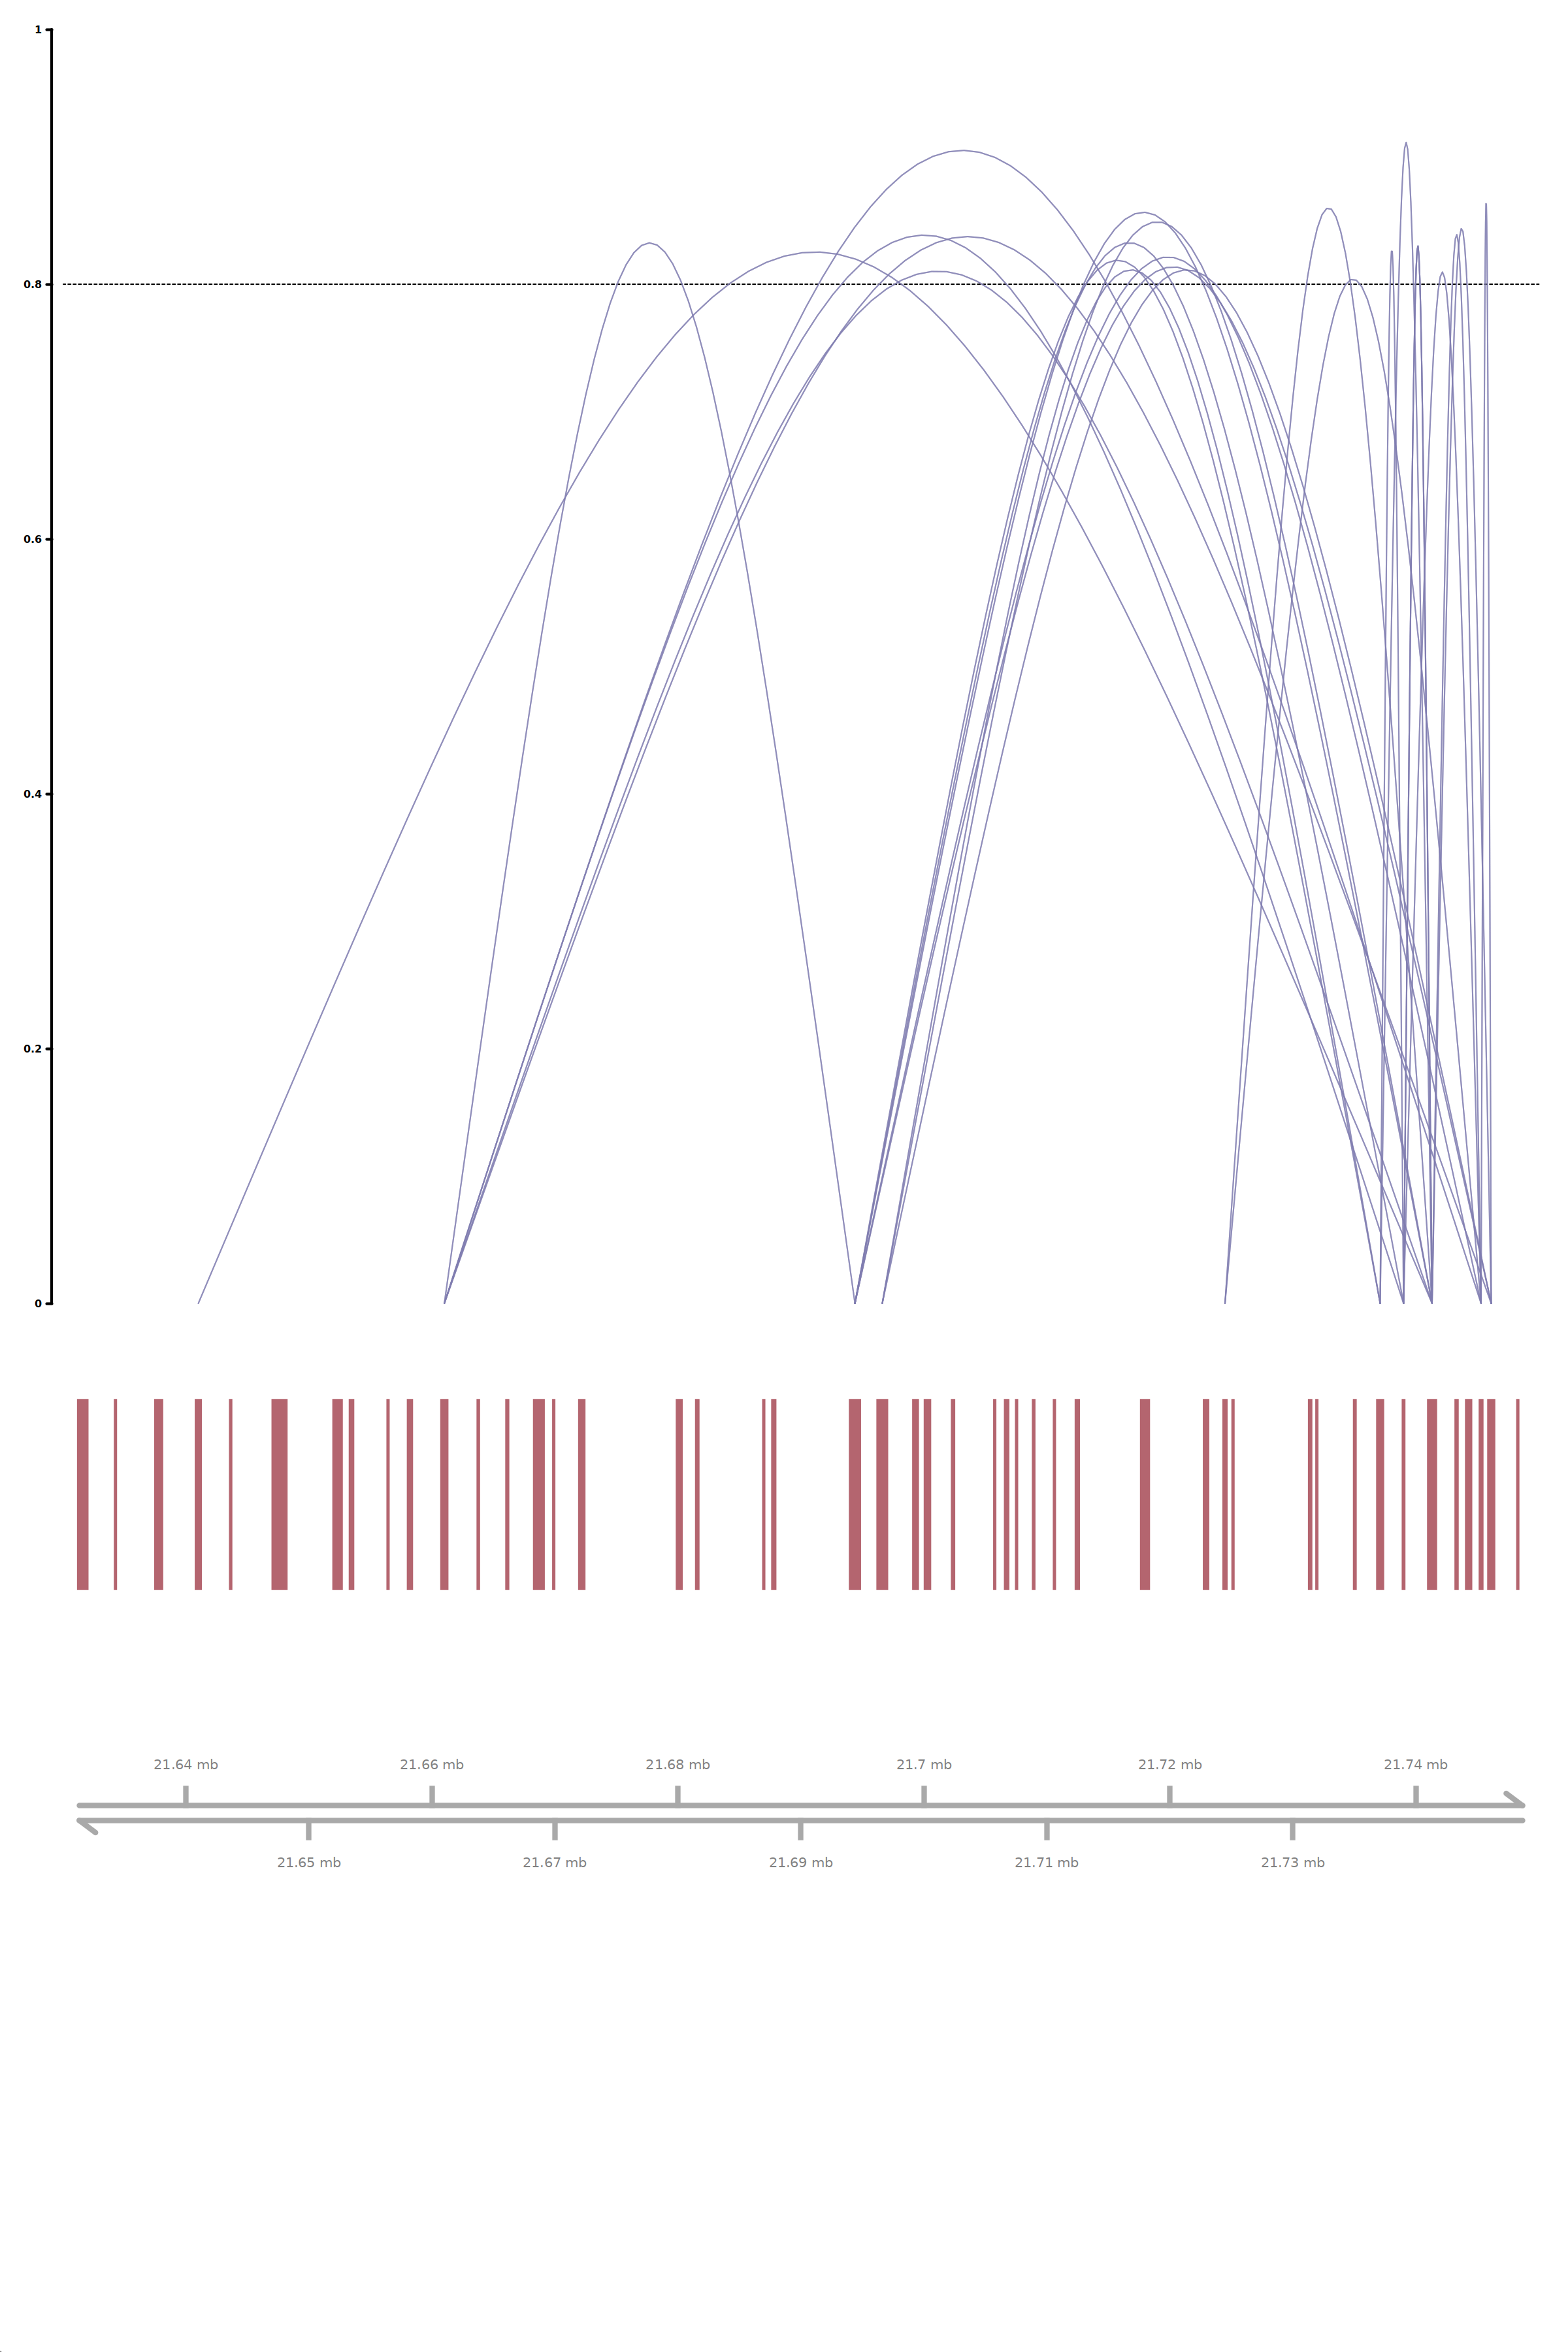

In [36]:
# generate the linkage plot for a given genomic region 
# showing the co-accessibility strengths using the line width.
# NOTE that cicero generates the linkage plot based on genomic regions/domains, not per-gene basis.
plot_connections(conns, chromosome, 21630000, 21750000,
                 gene_model = gene_anno, 
                 coaccess_cutoff = .80, 
                 connection_width = .5, 
                 collapseTranscripts = "longest")

In [35]:
1

[1] 1

### coverage plots

- Signac style


In [9]:
# Load the plotting module
source("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/scripts/module_coverage_plot_viz.R")


In [20]:
seurat_obj@assays$peaks_merged@ranges

GRanges object with 485357 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]        1         3427-4032      *
       [2]        1         4473-6136      *
       [3]        1       11020-12944      *
       [4]        1       13368-13575      *
       [5]        1       14640-15050      *
       ...      ...               ...    ...
  [485353]        9 56298513-56299501      *
  [485354]        9 56396807-56397687      *
  [485355]        9 56400365-56401096      *
  [485356]        9 56411957-56412701      *
  [485357]        9 56433462-56434391      *
  -------
  seqinfo: 26 sequences from an unspecified genome; no seqlengths

In [21]:
options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)

generate_coverage_plots <- function(object, gene, filepath){
    
      # Check if gene exists in GTF file
      if (!gene %in% object@assays$ATAC@annotation$gene_name) {
        cat("Gene", gene, "not found in GTF file. Skipping.\n")
        return(NULL)
      }
    
    # make sure that the major identity is "orig.ident" for bulk peak profile
    Idents(object) <- "orig.ident"
    # peak profile for the bulk counts
    cov_plot_bulk <- CoveragePlot(
      object = object,
      region = gene,
      annotation=FALSE,
      peaks=FALSE
      #ranges = peaks,
      #ranges.title = "MACS2"
    )

    # we have to manually change the basic identity for Seurat
    Idents(object) <- "global_annotation"
    
    # peak profile for the counts (cell-type, predicted.id)
    cov_plot_celltype <- CoveragePlot(
        object = object, 
        region = gene,
        annotation = FALSE,
        peaks=FALSE
    )
    
    # for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
    gene.coord <- LookupGeneCoords(object = object, gene = gene)
    gene.coord.df <- as.data.frame(gene.coord)
    
    # extract the chromosome number, start position and end position
    chromosome <- gene.coord.df$seqnames
    pos_start <- gene.coord.df$start
    pos_end <-gene.coord.df$end
    
    # compute the genomic region as "chromsome_number-start-end"
    genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")
    
    # gene annotation
    gene_plot <- AnnotationPlot(
      object = object,
      region = genomic_region
    )
    # gene_plot


    # cellranger-arc peaks
    peak_plot_CRG <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$ATAC@ranges
    ) + labs(y="CRG-arc")
    # peak_plot

    # MACS2-bulk peaks
    peak_plot_bulk <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_bulk@ranges,
      color = "blue"
    )+ labs(y="bulk")

    # MACS2-cell-type-specific peaks
    peak_plot_celltype <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_celltype@ranges,
      color = "red"
    )+ labs(y="cell-type")
    
    # iteratively integrated peaks (peaks_integrated: peaks_celltype, peaks_bulk, then CRG_arc order)
    peak_plot_merged <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_merged@ranges,
      color = "purple"
    )+ labs(y="integrated")

    # expression of RNA
    expr_plot <- ExpressionPlot(
      object = object,
      features = gene,
      assay = "RNA"
    )

    plot<-CombineTracks(
      plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                      peak_plot_CRG, peak_plot_bulk, peak_plot_celltype, peak_plot_merged,
                      gene_plot),
      expression.plot = expr_plot,
      heights = c(10,3,1,1,1,1,2),
      widths = c(10, 1)
    )
    
    options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)
#     ggsave(paste0(filepath, "coverage_plot_", gene, "_allpeaks.png"), plot=plot, width=8, height=12)
    return(plot)
    
}



In [23]:
coverage_plot <- generate_coverage_plots(object = seurat_obj, gene = "tbxta", 
                        filepath = None)

In [25]:
ggsave(coverage_plot, filename = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peaks_TDR118/coverage_plot_all_peak_profiles_tbxta.pdf",
       device="pdf", height=12, width=8, units="in", dpi=300)

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


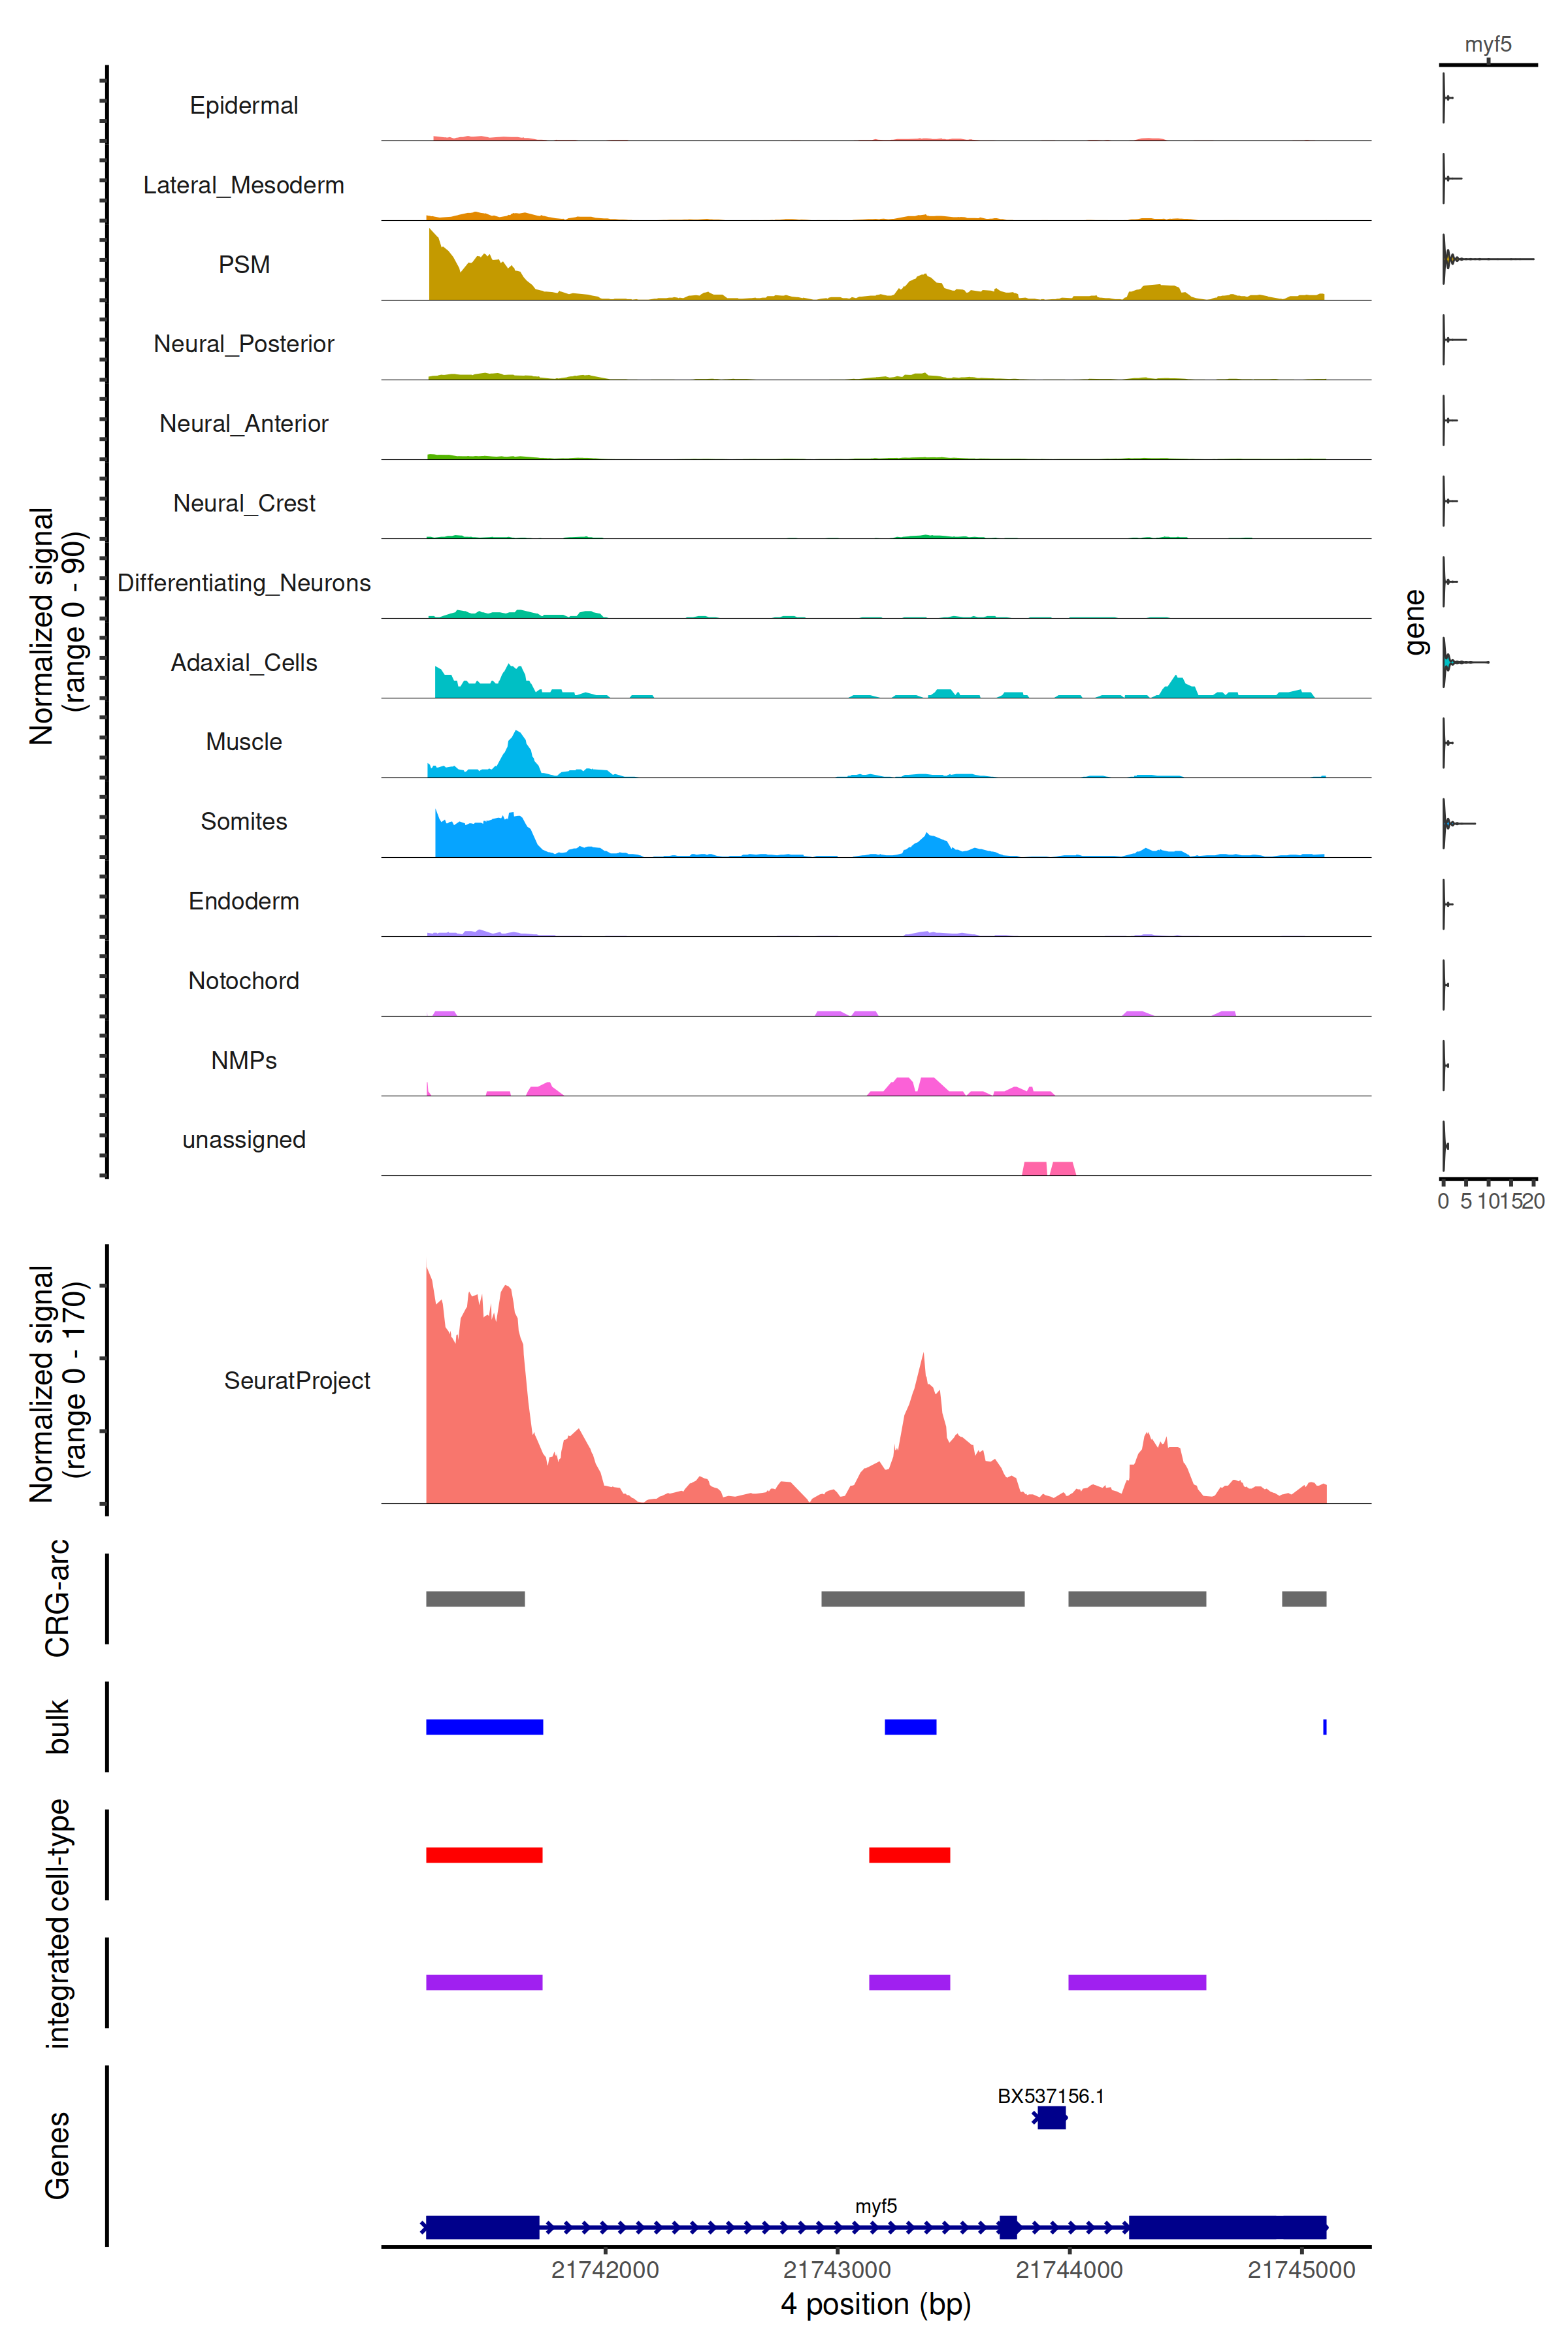

In [38]:
coverage_plot <- generate_coverage_plots(object = seurat_obj, gene = "myf5", 
                        filepath = None)
coverage_plot

In [25]:
ggsave(coverage_plot, filename = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peaks_TDR118/coverage_plot_all_peak_profiles_tbxta.pdf",
       device="pdf", height=12, width=8, units="in", dpi=300)

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


In [44]:
genomic_region <-StringToGRanges("chr4-21630000-21750000")
genomic_region

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]     chr4 21630000-21750000      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [51]:
# for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
gene.coord <- LookupGeneCoords(object = seurat_obj, gene = "myf5")
gene.coord.df <- as.data.frame(gene.coord)

# extract the chromosome number, start position and end position
chromosome <- gene.coord.df$seqnames
pos_start <- gene.coord.df$start
pos_end <-gene.coord.df$end

# compute the genomic region as "chromsome_number-start-end"
genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")
genomic_region

[1] "4-21741228-21745107"

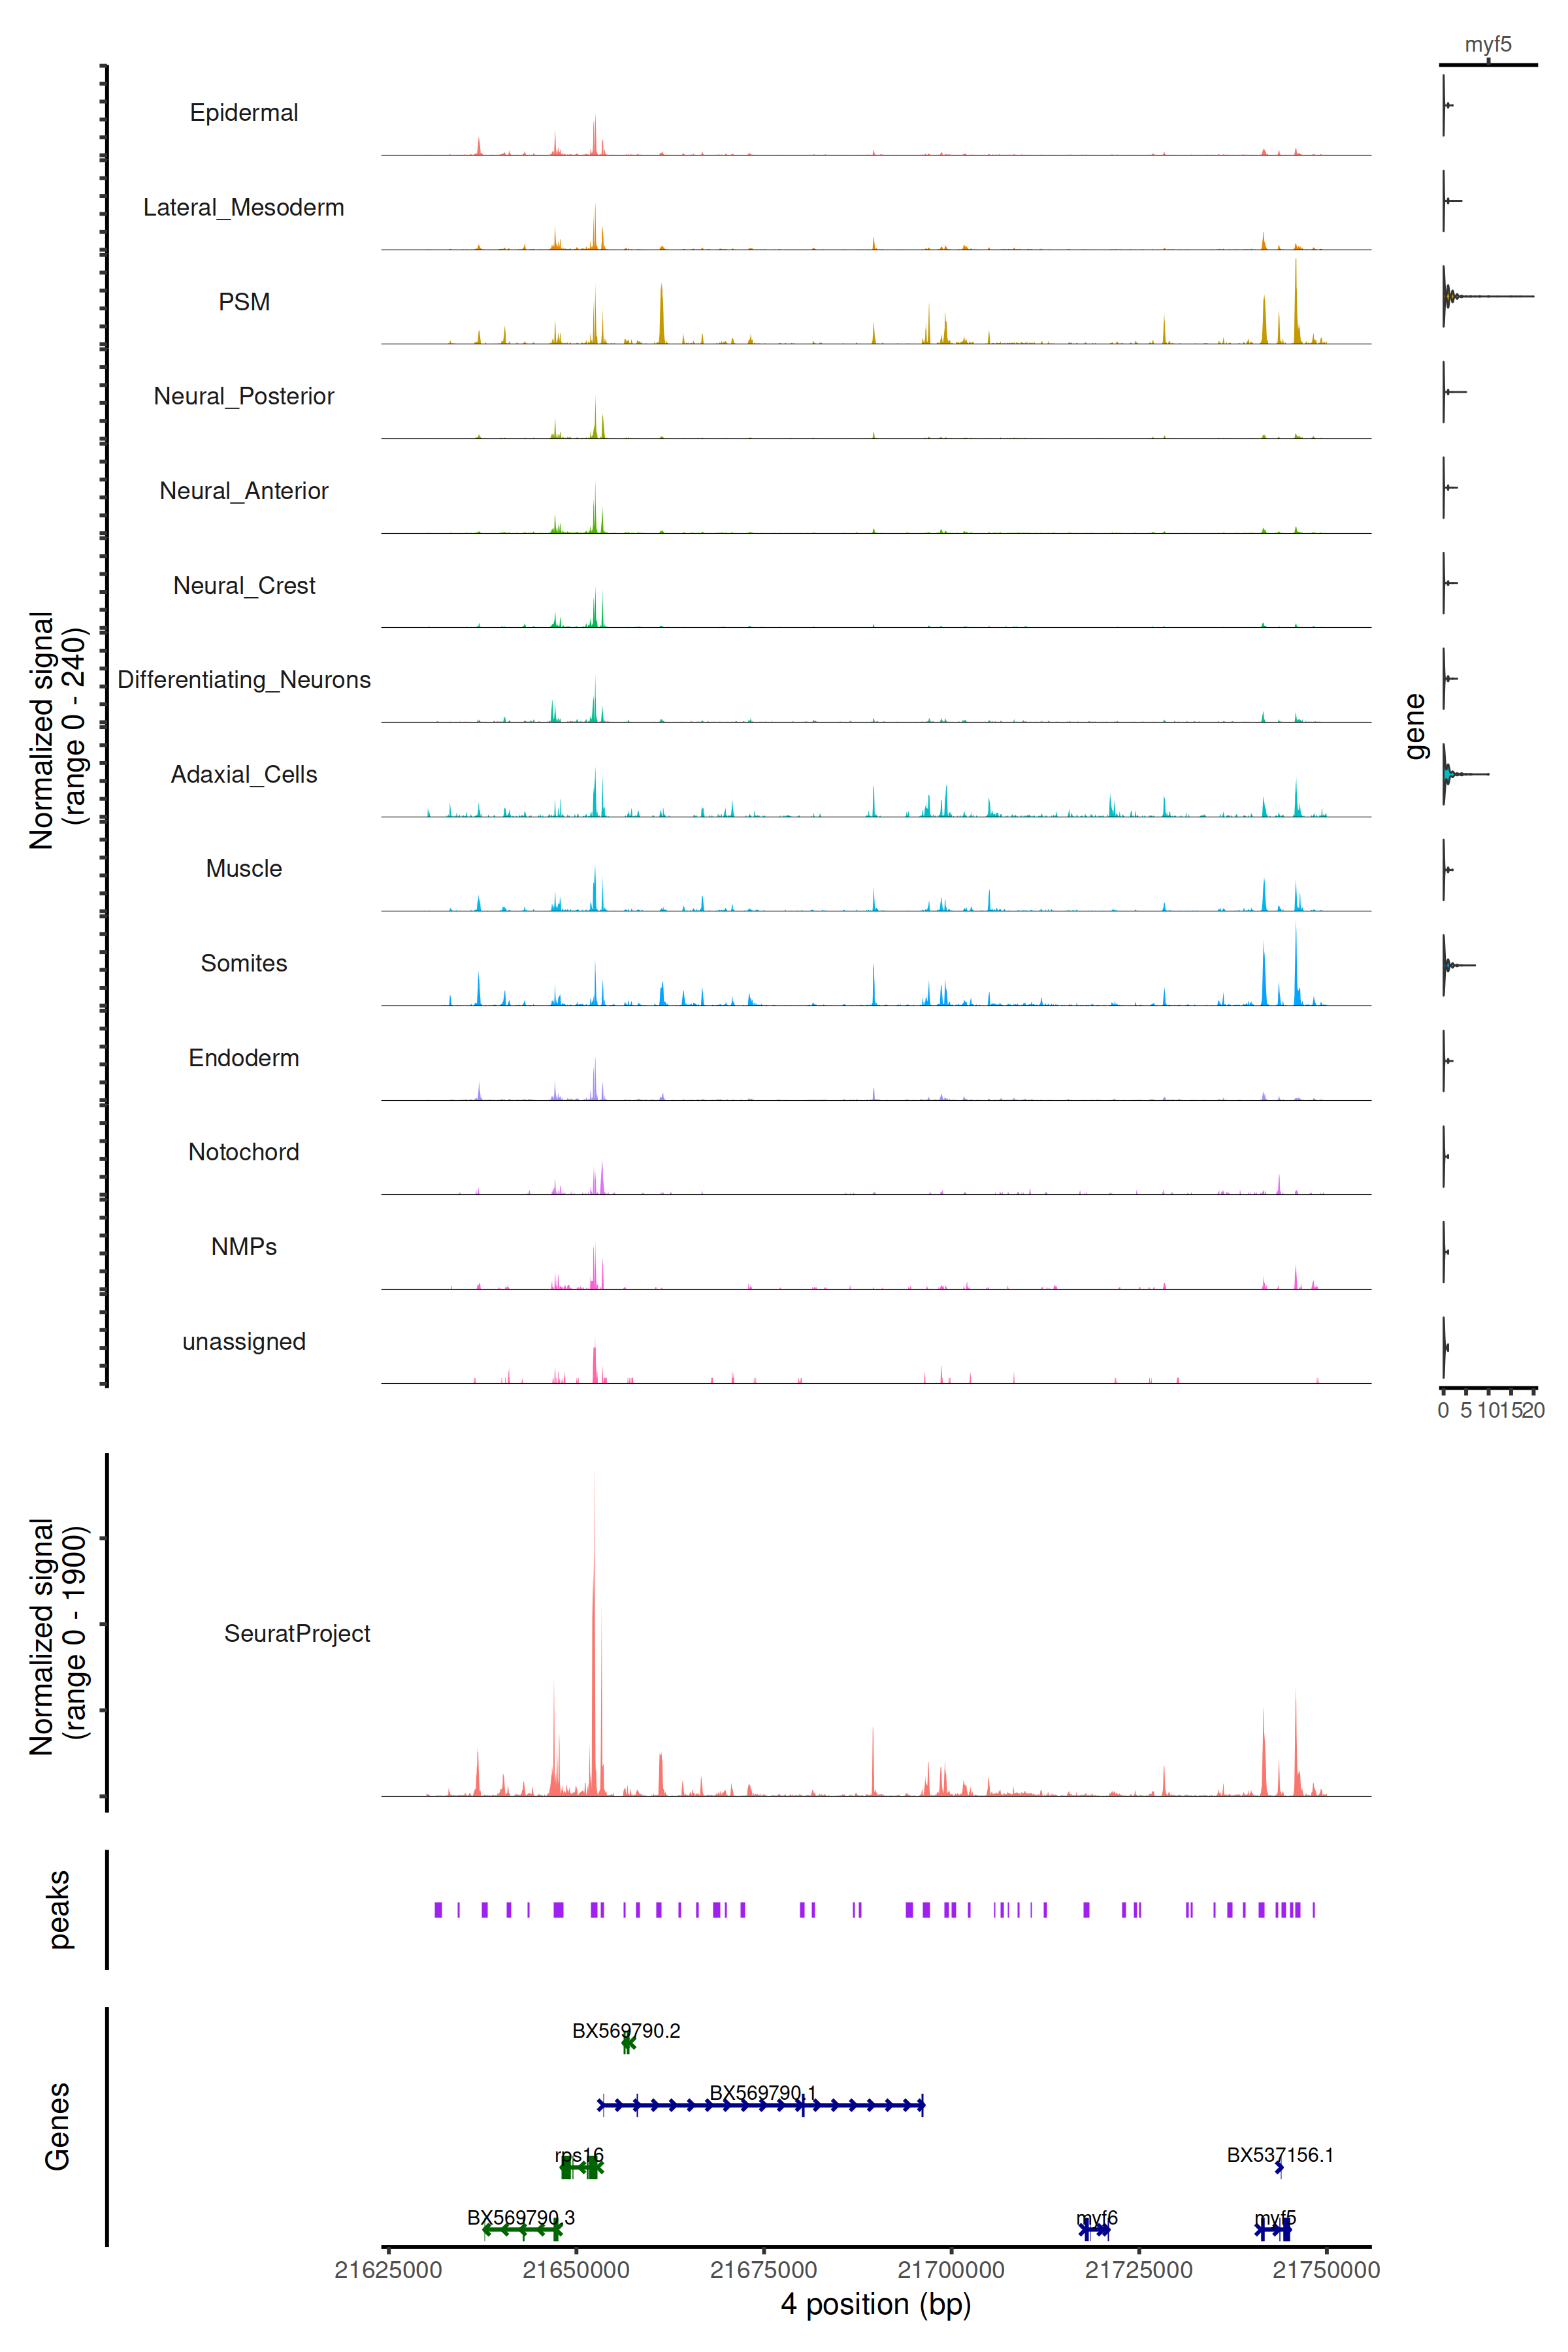

In [62]:
options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)

object <- seurat_obj
gene <- "myf5"

# # for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
# gene.coord <- LookupGeneCoords(object = object, gene = gene)
# gene.coord.df <- as.data.frame(gene.coord)

# # extract the chromosome number, start position and end position
# chromosome <- gene.coord.df$seqnames
# pos_start <- gene.coord.df$start
# pos_end <-gene.coord.df$end

# # compute the genomic region as "chromsome_number-start-end"
# genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")

# manually adding the genomic region
genomic_region <-StringToGRanges("4-21630000-21750000")

# make sure that the major identity is "orig.ident" for bulk peak profile
Idents(object) <- "orig.ident"
# peak profile for the bulk counts
cov_plot_bulk <- CoveragePlot(
  object = object,
  region = gene, #genomic_region,
  extend.upstream = 110000,
  annotation=FALSE,
  peaks=FALSE
  #ranges = peaks,
  #ranges.title = "MACS2"
)

# we have to manually change the basic identity for Seurat
Idents(object) <- "global_annotation"

# peak profile for the counts (cell-type, predicted.id)
cov_plot_celltype <- CoveragePlot(
    object = object, 
    region = gene,
    extend.upstream = 110000,
    annotation = FALSE,
    peaks=FALSE
)
    


# gene annotation
gene_plot <- AnnotationPlot(
  object = object,
  region = genomic_region
)
    # gene_plot


# # cellranger-arc peaks
# peak_plot_CRG <- PeakPlot(
#   object = object,
#   region = genomic_region,
#   peaks=object@assays$ATAC@ranges
# ) + labs(y="CRG-arc")
# # peak_plot

# # MACS2-bulk peaks
# peak_plot_bulk <- PeakPlot(
#   object = object,
#   region = genomic_region,
#   peaks=object@assays$peaks_bulk@ranges,
#   color = "blue"
# )+ labs(y="bulk")

# # MACS2-cell-type-specific peaks
# peak_plot_celltype <- PeakPlot(
#   object = object,
#   region = genomic_region,
#   peaks=object@assays$peaks_celltype@ranges,
#   color = "red"
# )+ labs(y="cell-type")
    
# iteratively integrated peaks (peaks_integrated: peaks_celltype, peaks_bulk, then CRG_arc order)
peak_plot_merged <- PeakPlot(
  object = object,
  region = genomic_region,
  peaks=object@assays$peaks_merged@ranges,
  color = "purple"
)+ labs(y="peaks")

# expression of RNA
expr_plot <- ExpressionPlot(
  object = object,
  features = gene,
  assay = "RNA"
)

plot<-CombineTracks(
  plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                  peak_plot_merged,gene_plot),
  expression.plot = expr_plot,
  heights = c(10,3,1,2),
  widths = c(10, 1)
)

plot

options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)
#     ggsave(paste0(filepath, "coverage_plot_", gene, "_allpeaks.png"), plot=plot, width=8, height=12)





Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


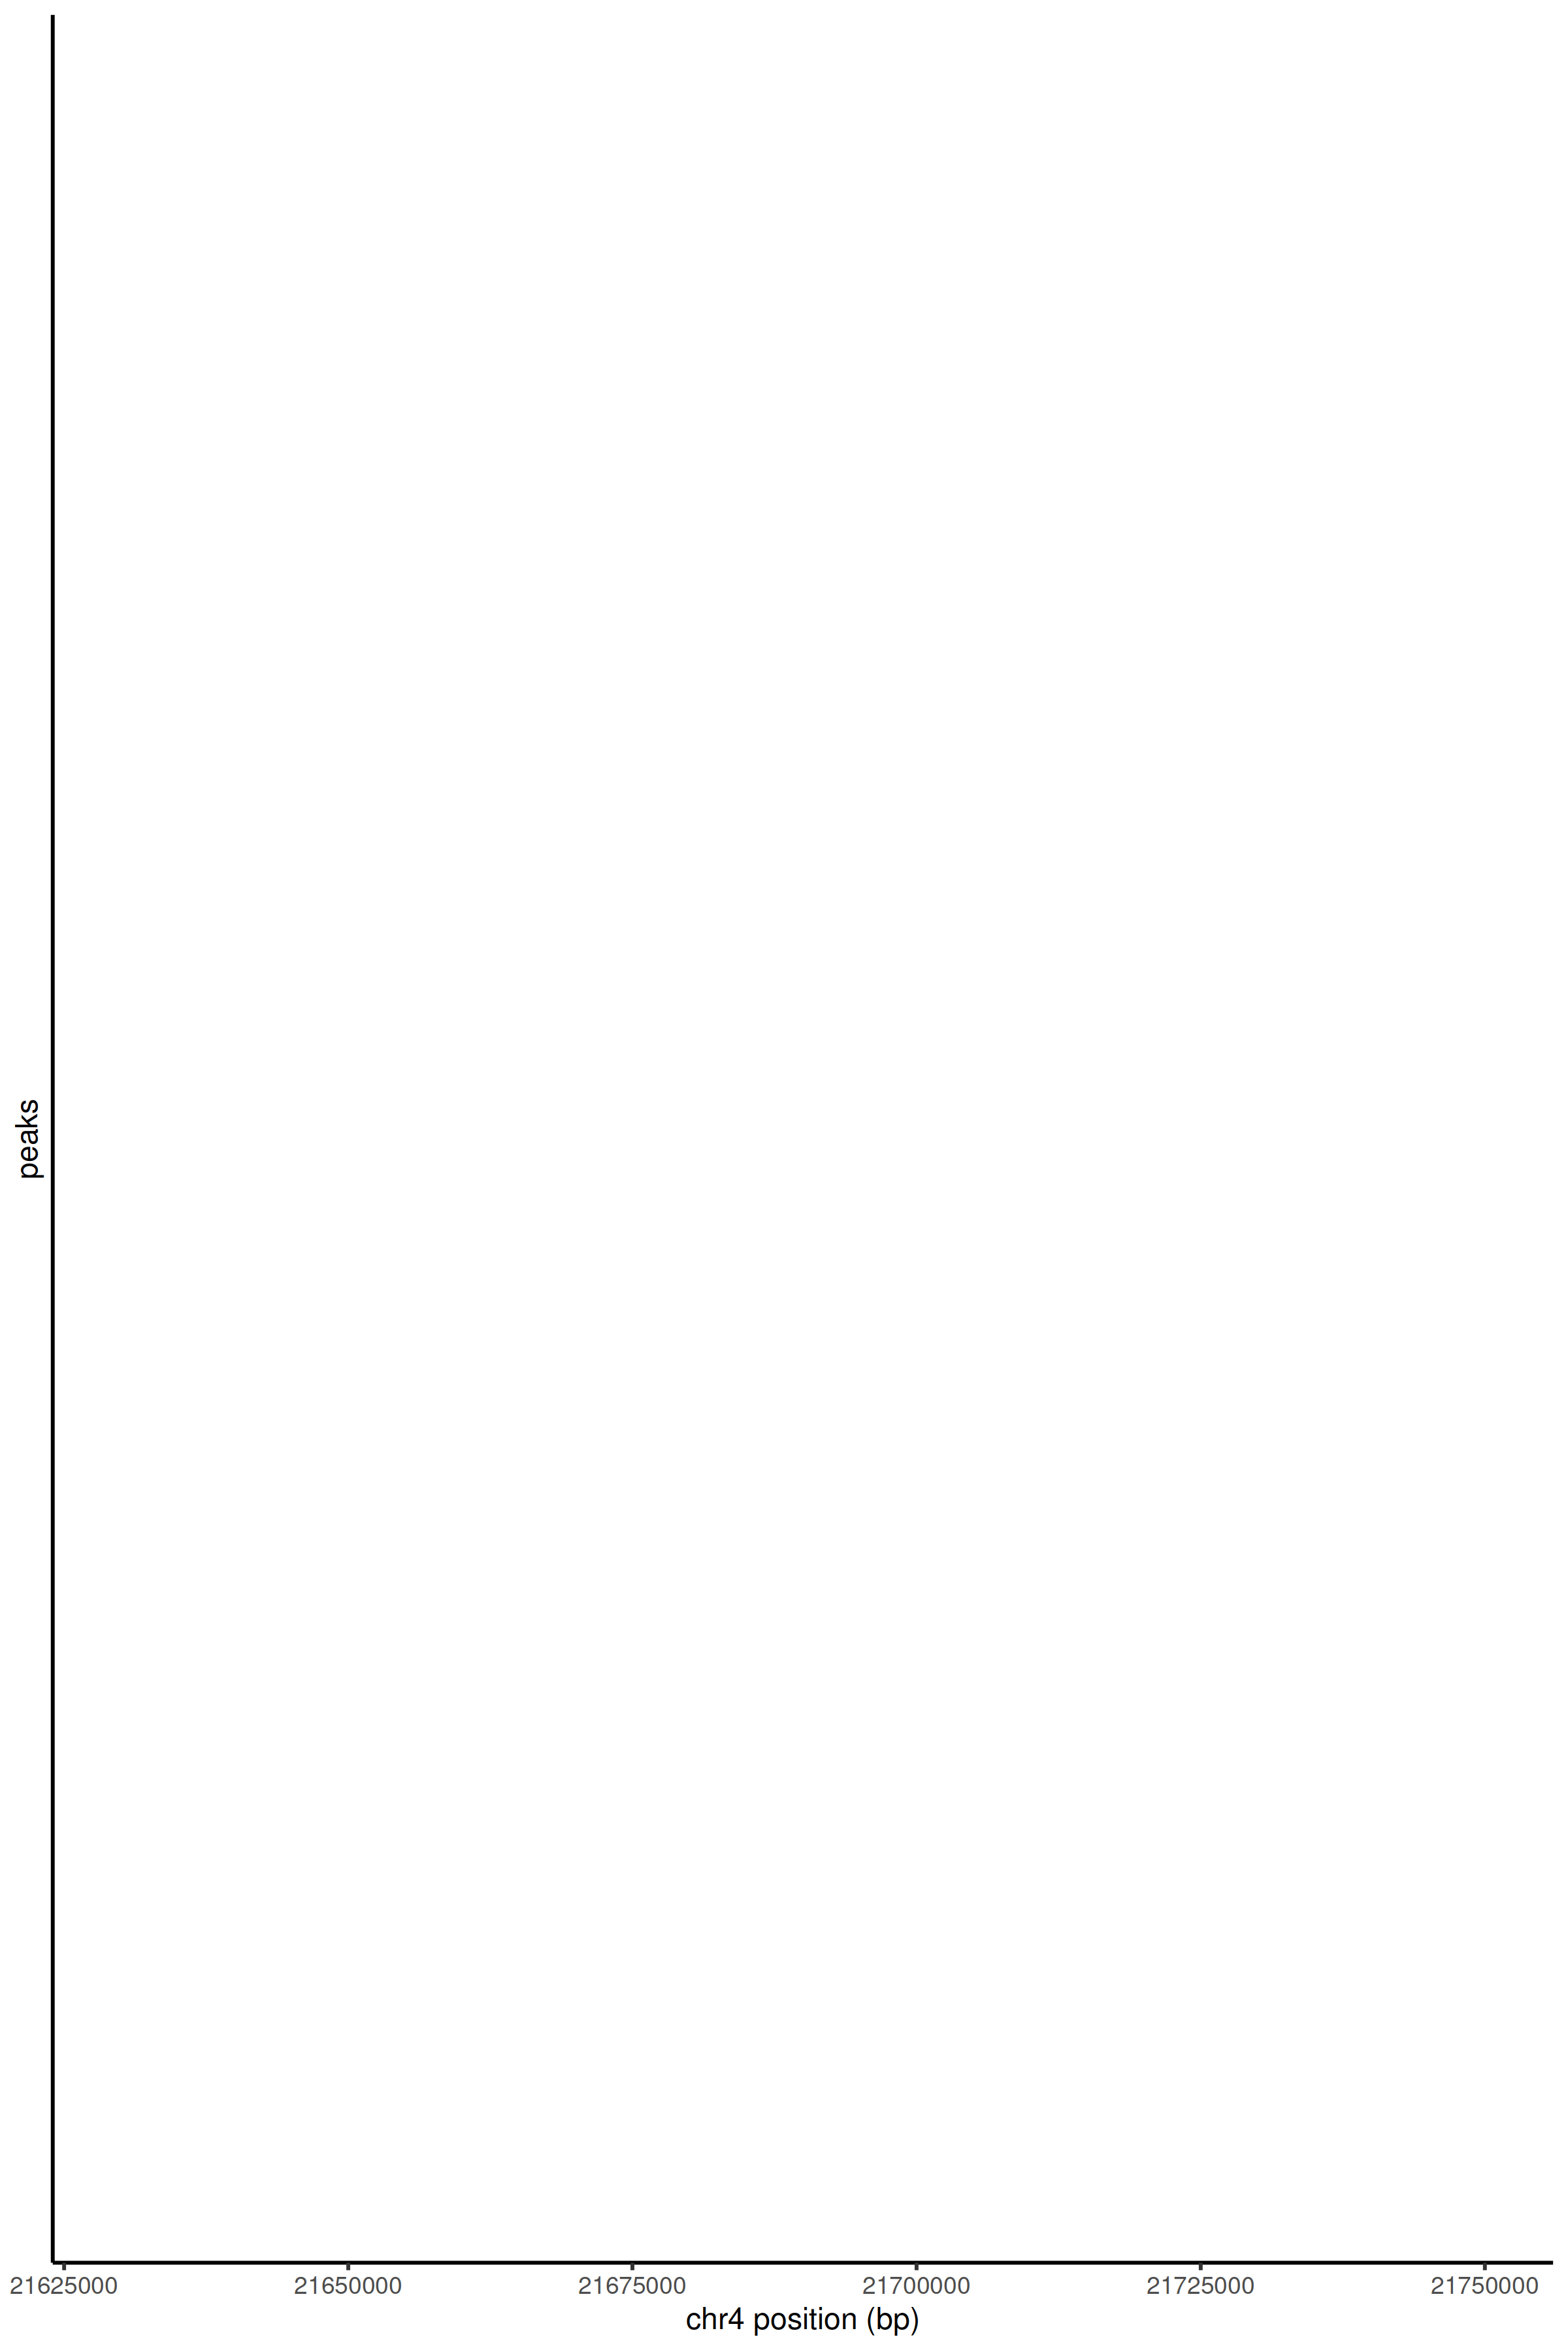

In [61]:
peak_plot_merged <- PeakPlot(
  object = object,
  region = genomic_region,
  peaks=object@assays$peaks_merged@ranges,
  color = "purple"
)+ labs(y="peaks")

peak_plot_merged

In [12]:
# import the Seurat object
TDR118 <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/annotated_data/TDR118/TDR118_processed.rds")
TDR118

In [5]:
TDR118@assays$ATAC@fragments

[[1]]
A Fragment object for 13022 cells


In [6]:
### NOTE: This step is not required anymore (any dataset that is processed using snakemake pipeline)
# since we moved between servers, we need to update the filepath for the "Fragment" object within the Seurat object
# NOTE that we need to update it manually for every Signac object (ATAC object)
TDR118@assays$ATAC@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"
TDR118@assays$peaks_celltype@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"
TDR118@assays$peaks_bulk@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


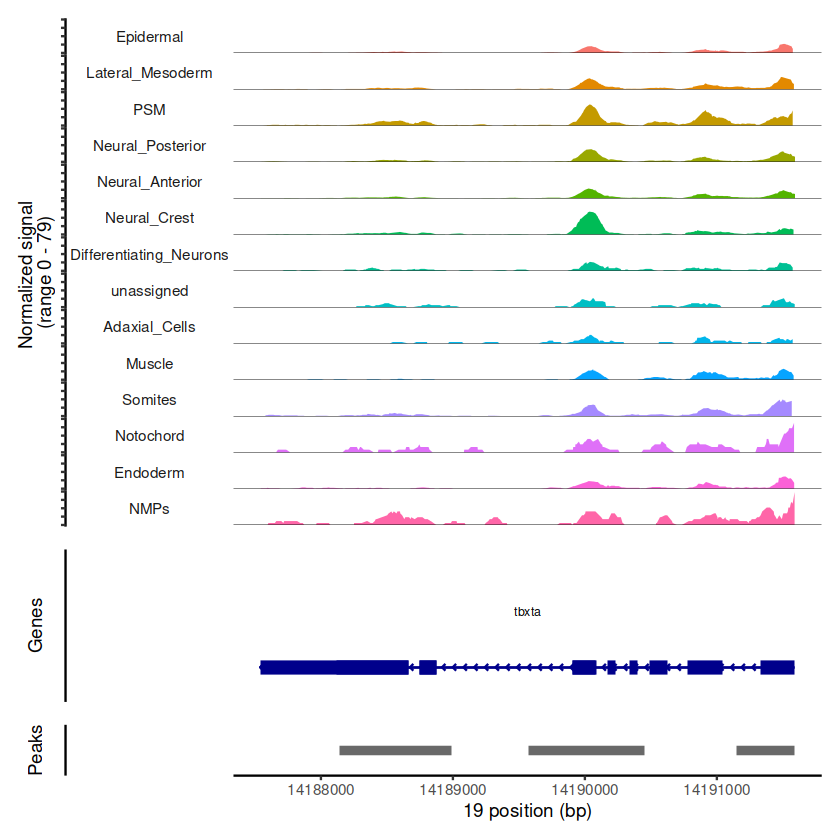

In [7]:
CoveragePlot(TDR118, region = "tbxta")

In [80]:
gene.coord <- LookupGeneCoords(object = TDR118, gene = "tbxta")
gene.coord

gene.coord.df <- as.data.frame(gene.coord)
gene.coord.df

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 14187540-14191592      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
19,14187540,14191592,4053,*


In [92]:
gene.coord <- LookupGeneCoords(object = TDR118, gene = "tbxta")
gene.coord

gene.coord.df <- as.data.frame(gene.coord)
gene.coord.df

chromosome <- gene.coord.df$seqnames
pos_start <- gene.coord.df$start
pos_end <-gene.coord.df$end

In [94]:
c(chromosome,"-",pos_start,"-",pos_end)

[1] "1"        "-"        "14187540" "-"        "14191592"

 Factor w/ 1 level "19": 1


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


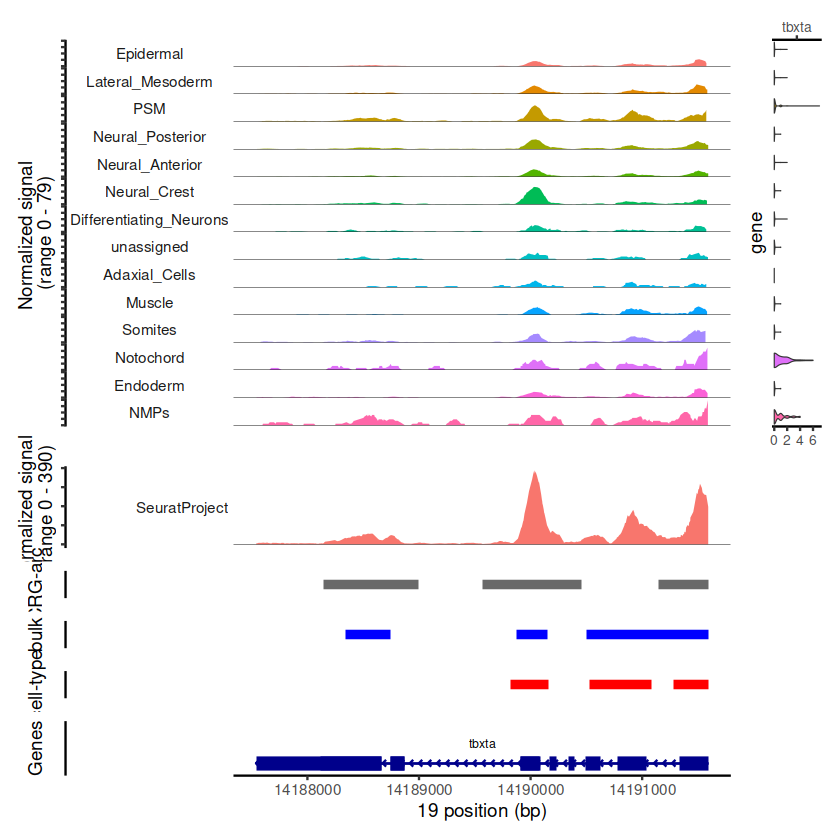

In [103]:
gene = "tbxta"

# Compare the called peaks using a Coverage Plot
Idents(TDR118) <- "orig.ident"

cov_plot_bulk <- CoveragePlot(
  object = TDR118,
  region = "tbxta",
  annotation=FALSE,
  peaks=FALSE
  #ranges = peaks,
  #ranges.title = "MACS2"
)

# we have to manually change the basic identity for Seurat
Idents(TDR118) <- "predicted.id"
cov_plot_celltype <- CoveragePlot(
    object = TDR118, 
    region = "tbxta",
    annotation = FALSE,
    peaks=FALSE
)

# gene annotation
gene_plot <- AnnotationPlot(
  object = TDR118,
  region = "19-14187540-14191592"
)
# gene_plot


# cellranger-arc peaks
peak_plot_CRG <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$ATAC@ranges
) + labs(y="CRG-arc")
# peak_plot

# MACS2-bulk peaks
peak_plot_bulk <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$peaks_bulk@ranges,
  color = "blue"
)+ labs(y="bulk")

# MACS2-cell-type-specific peaks
peak_plot_celltype <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$peaks_celltype@ranges,
  color = "red"
)+ labs(y="cell-type")


# expression of RNA
expr_plot <- ExpressionPlot(
  object = TDR118,
  features = "tbxta",
  assay = "RNA"
)

# Patchwork
# cov_plot/
# (cov_plot_celltype | expr_plot)/
# gene_plot/
# peak_plot_CRG/
# peak_plot_bulk/
# peak_plot_celltype

CombineTracks(
  plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                  peak_plot_CRG, peak_plot_bulk, peak_plot_celltype, 
                  gene_plot),
  expression.plot = expr_plot,
  heights = c(10,3,1,1,1,2),
  widths = c(10, 1)
)

In [11]:
options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)

generate_coverage_plots <- function(object, gene, filepath){
    
      # Check if gene exists in GTF file
      if (!gene %in% object@assays$ATAC@annotation$gene_name) {
        cat("Gene", gene, "not found in GTF file. Skipping.\n")
        return(NULL)
      }
    
    # make sure that the major identity is "orig.ident" for bulk peak profile
    Idents(object) <- "orig.ident"
    # peak profile for the bulk counts
    cov_plot_bulk <- CoveragePlot(
      object = object,
      region = gene,
      annotation=FALSE,
      peaks=FALSE
      #ranges = peaks,
      #ranges.title = "MACS2"
    )

    # we have to manually change the basic identity for Seurat
    Idents(object) <- "predicted.id"
    
    # peak profile for the counts (cell-type, predicted.id)
    cov_plot_celltype <- CoveragePlot(
        object = object, 
        region = gene,
        annotation = FALSE,
        peaks=FALSE
    )
    
    # for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
    gene.coord <- LookupGeneCoords(object = object, gene = gene)
    gene.coord.df <- as.data.frame(gene.coord)
    
    # extract the chromosome number, start position and end position
    chromosome <- gene.coord.df$seqnames
    pos_start <- gene.coord.df$start
    pos_end <-gene.coord.df$end
    
    # compute the genomic region as "chromsome_number-start-end"
    genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")
    
    # gene annotation
    gene_plot <- AnnotationPlot(
      object = object,
      region = genomic_region
    )
    # gene_plot


    # cellranger-arc peaks
    peak_plot_CRG <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$ATAC@ranges
    ) + labs(y="CRG-arc")
    # peak_plot

    # MACS2-bulk peaks
    peak_plot_bulk <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_bulk@ranges,
      color = "blue"
    )+ labs(y="bulk")

    # MACS2-cell-type-specific peaks
    peak_plot_celltype <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_celltype@ranges,
      color = "red"
    )+ labs(y="cell-type")
    
    # iteratively integrated peaks (peaks_integrated: peaks_celltype, peaks_bulk, then CRG_arc order)
    peak_plot_celltype <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_merged@ranges,
      color = "purple"
    )+ labs(y="integrated")

    # expression of RNA
    expr_plot <- ExpressionPlot(
      object = object,
      features = gene,
      assay = "RNA"
    )

    plot<-CombineTracks(
      plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                      peak_plot_CRG, peak_plot_bulk, peak_plot_celltype, 
                      gene_plot),
      expression.plot = expr_plot,
      heights = c(10,3,1,1,1,2),
      widths = c(10, 1)
    )
    
    options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)
#     ggsave(paste0(filepath, "coverage_plot_", gene, "_allpeaks.png"), plot=plot, width=8, height=12)
    return(plot)
    
}

# 

In [112]:
generate_coverage_plots(object = TDR118, gene = "tbxta", 
                        filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/coverage_plots_TDR118/")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


In [118]:
list_genes <- list("lrrc17","comp","ripply1","rx1","vsx2","tbx16","myf5",
                   "hes6","crestin","ednrab","dlx2a","cldni","cfl1l",
                   "fezf1","sox1b","foxg1a","olig3","hoxd4a","rxrga",
                   "gata5","myh7","tnnt2a",'pkd1b',"scg3","etv5a","pitx3",
                   "elavl3","stmn1b","sncb","myog","myl1","jam2a",
                   "prrx1","nid1b","cpox","gata1a","hbbe1","unc45b","ttn1",
                   "apobec2a","foxi3b","atp1b1b","fli1b","kdrl","anxa4",
                   "cldnc","cldn15a","tbx3b","loxl5b","emilin3a","sema3aa","irx7","vegfaa",
                   "ppl","krt17","icn2","osr1","hand2","shha","shhb","foxa2",
                   "cebpa","spi1b","myb","ctslb","surf4l","sec61a1l","mcf2lb",
                   "bricd5","etnk1","chd17","acy3")
list_genes

[[1]]
[1] "lrrc17"

[[2]]
[1] "comp"

[[3]]
[1] "ripply1"

[[4]]
[1] "rx1"

[[5]]
[1] "vsx2"

[[6]]
[1] "tbx16"

[[7]]
[1] "myf5"

[[8]]
[1] "hes6"

[[9]]
[1] "crestin"

[[10]]
[1] "ednrab"

[[11]]
[1] "dlx2a"

[[12]]
[1] "cldni"

[[13]]
[1] "cfl1l"

[[14]]
[1] "fezf1"

[[15]]
[1] "sox1b"

[[16]]
[1] "foxg1a"

[[17]]
[1] "olig3"

[[18]]
[1] "hoxd4a"

[[19]]
[1] "rxrga"

[[20]]
[1] "gata5"

[[21]]
[1] "myh7"

[[22]]
[1] "tnnt2a"

[[23]]
[1] "pkd1b"

[[24]]
[1] "scg3"

[[25]]
[1] "etv5a"

[[26]]
[1] "pitx3"

[[27]]
[1] "elavl3"

[[28]]
[1] "stmn1b"

[[29]]
[1] "sncb"

[[30]]
[1] "myog"

[[31]]
[1] "myl1"

[[32]]
[1] "jam2a"

[[33]]
[1] "prrx1"

[[34]]
[1] "nid1b"

[[35]]
[1] "cpox"

[[36]]
[1] "gata1a"

[[37]]
[1] "hbbe1"

[[38]]
[1] "unc45b"

[[39]]
[1] "ttn1"

[[40]]
[1] "apobec2a"

[[41]]
[1] "foxi3b"

[[42]]
[1] "atp1b1b"

[[43]]
[1] "fli1b"

[[44]]
[1] "kdrl"

[[45]]
[1] "anxa4"

[[46]]
[1] "cldnc"

[[47]]
[1] "cldn15a"

[[48]]
[1] "tbx3b"

[[49]]
[1] "loxl5b"

[[50]]
[1] "emilin3a"

[[51]]
[1] "sema3aa"

[[52]]
[1] "irx7"

[[53]]
[1] "vegfaa"

[[54]]
[1] "ppl"

[[55]]
[1] "krt17"

[[56]]
[1] "icn2"

[[57]]
[1] "osr1"

[[58]]
[1] "hand2"

[[59]]
[1] "shha"

[[60]]
[1] "shhb"

[[61]]
[1] "foxa2"

[[62]]
[1] "cebpa"

[[63]]
[1] "spi1b"

[[64]]
[1] "myb"

[[65]]
[1] "ctslb"

[[66]]
[1] "surf4l"

[[67]]
[1] "sec61a1l"

[[68]]
[1] "mcf2lb"

[[69]]
[1] "bricd5"

[[70]]
[1] "etnk1"

[[71]]
[1] "chd17"

[[72]]
[1] "acy3"

In [117]:
list_genes <- unique(list_genes)
list_genes

[[1]]
[1] "lrrc17"

[[2]]
[1] "comp"

[[3]]
[1] "ripply1"

[[4]]
[1] "rx1"

[[5]]
[1] "vsx2"

[[6]]
[1] "tbx16"

[[7]]
[1] "myf5"

[[8]]
[1] "hes6"

[[9]]
[1] "crestin"

[[10]]
[1] "ednrab"

[[11]]
[1] "dlx2a"

[[12]]
[1] "cldni"

[[13]]
[1] "cfl1l"

[[14]]
[1] "fezf1"

[[15]]
[1] "sox1b"

[[16]]
[1] "foxg1a"

[[17]]
[1] "olig3"

[[18]]
[1] "hoxd4a"

[[19]]
[1] "rxrga"

[[20]]
[1] "gata5"

[[21]]
[1] "myh7"

[[22]]
[1] "tnnt2a"

[[23]]
[1] "pkd1b"

[[24]]
[1] "scg3"

[[25]]
[1] "etv5a"

[[26]]
[1] "pitx3"

[[27]]
[1] "elavl3"

[[28]]
[1] "stmn1b"

[[29]]
[1] "sncb"

[[30]]
[1] "myog"

[[31]]
[1] "myl1"

[[32]]
[1] "jam2a"

[[33]]
[1] "prrx1"

[[34]]
[1] "nid1b"

[[35]]
[1] "cpox"

[[36]]
[1] "gata1a"

[[37]]
[1] "hbbe1"

[[38]]
[1] "unc45b"

[[39]]
[1] "ttn1"

[[40]]
[1] "apobec2a"

[[41]]
[1] "foxi3b"

[[42]]
[1] "atp1b1b"

[[43]]
[1] "fli1b"

[[44]]
[1] "kdrl"

[[45]]
[1] "anxa4"

[[46]]
[1] "cldnc"

[[47]]
[1] "cldn15a"

[[48]]
[1] "tbx3b"

[[49]]
[1] "loxl5b"

[[50]]
[1] "emilin3a"

[[51]]
[1] "sema3aa"

[[52]]
[1] "irx7"

[[53]]
[1] "vegfaa"

[[54]]
[1] "ppl"

[[55]]
[1] "krt17"

[[56]]
[1] "icn2"

[[57]]
[1] "osr1"

[[58]]
[1] "hand2"

[[59]]
[1] "shha"

[[60]]
[1] "shhb"

[[61]]
[1] "foxa2"

[[62]]
[1] "cebpa"

[[63]]
[1] "spi1b"

[[64]]
[1] "myb"

[[65]]
[1] "ctslb"

[[66]]
[1] "surf4l"

[[67]]
[1] "sec61a1l"

[[68]]
[1] "mcf2lb"

[[69]]
[1] "bricd5"

[[70]]
[1] "etnk1"

[[71]]
[1] "chd17"

[[72]]
[1] "acy3"

In [ ]:
# Create a list to store the plot objects
plot_list <- list()

# Loop over 20 genes
for (gene in list_genes) {
  # Generate the coverage plot for the gene
  plot <- generate_coverage_plots(TDR118, gene)
  
  # Add the plot object to the list
  plot_list[[gene]] <- plot
}

# Create a PDF file
pdf("coverage_plots_15somite_marker_genes.pdf")

# Loop over the plot list and save each plot to a separate page in the PDF
for (gene in list_genes) {
  plot <- plot_list[[gene]]
  print(plot)
}

# Close the PDF file
dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows contai

NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows contain

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


$lrrc17


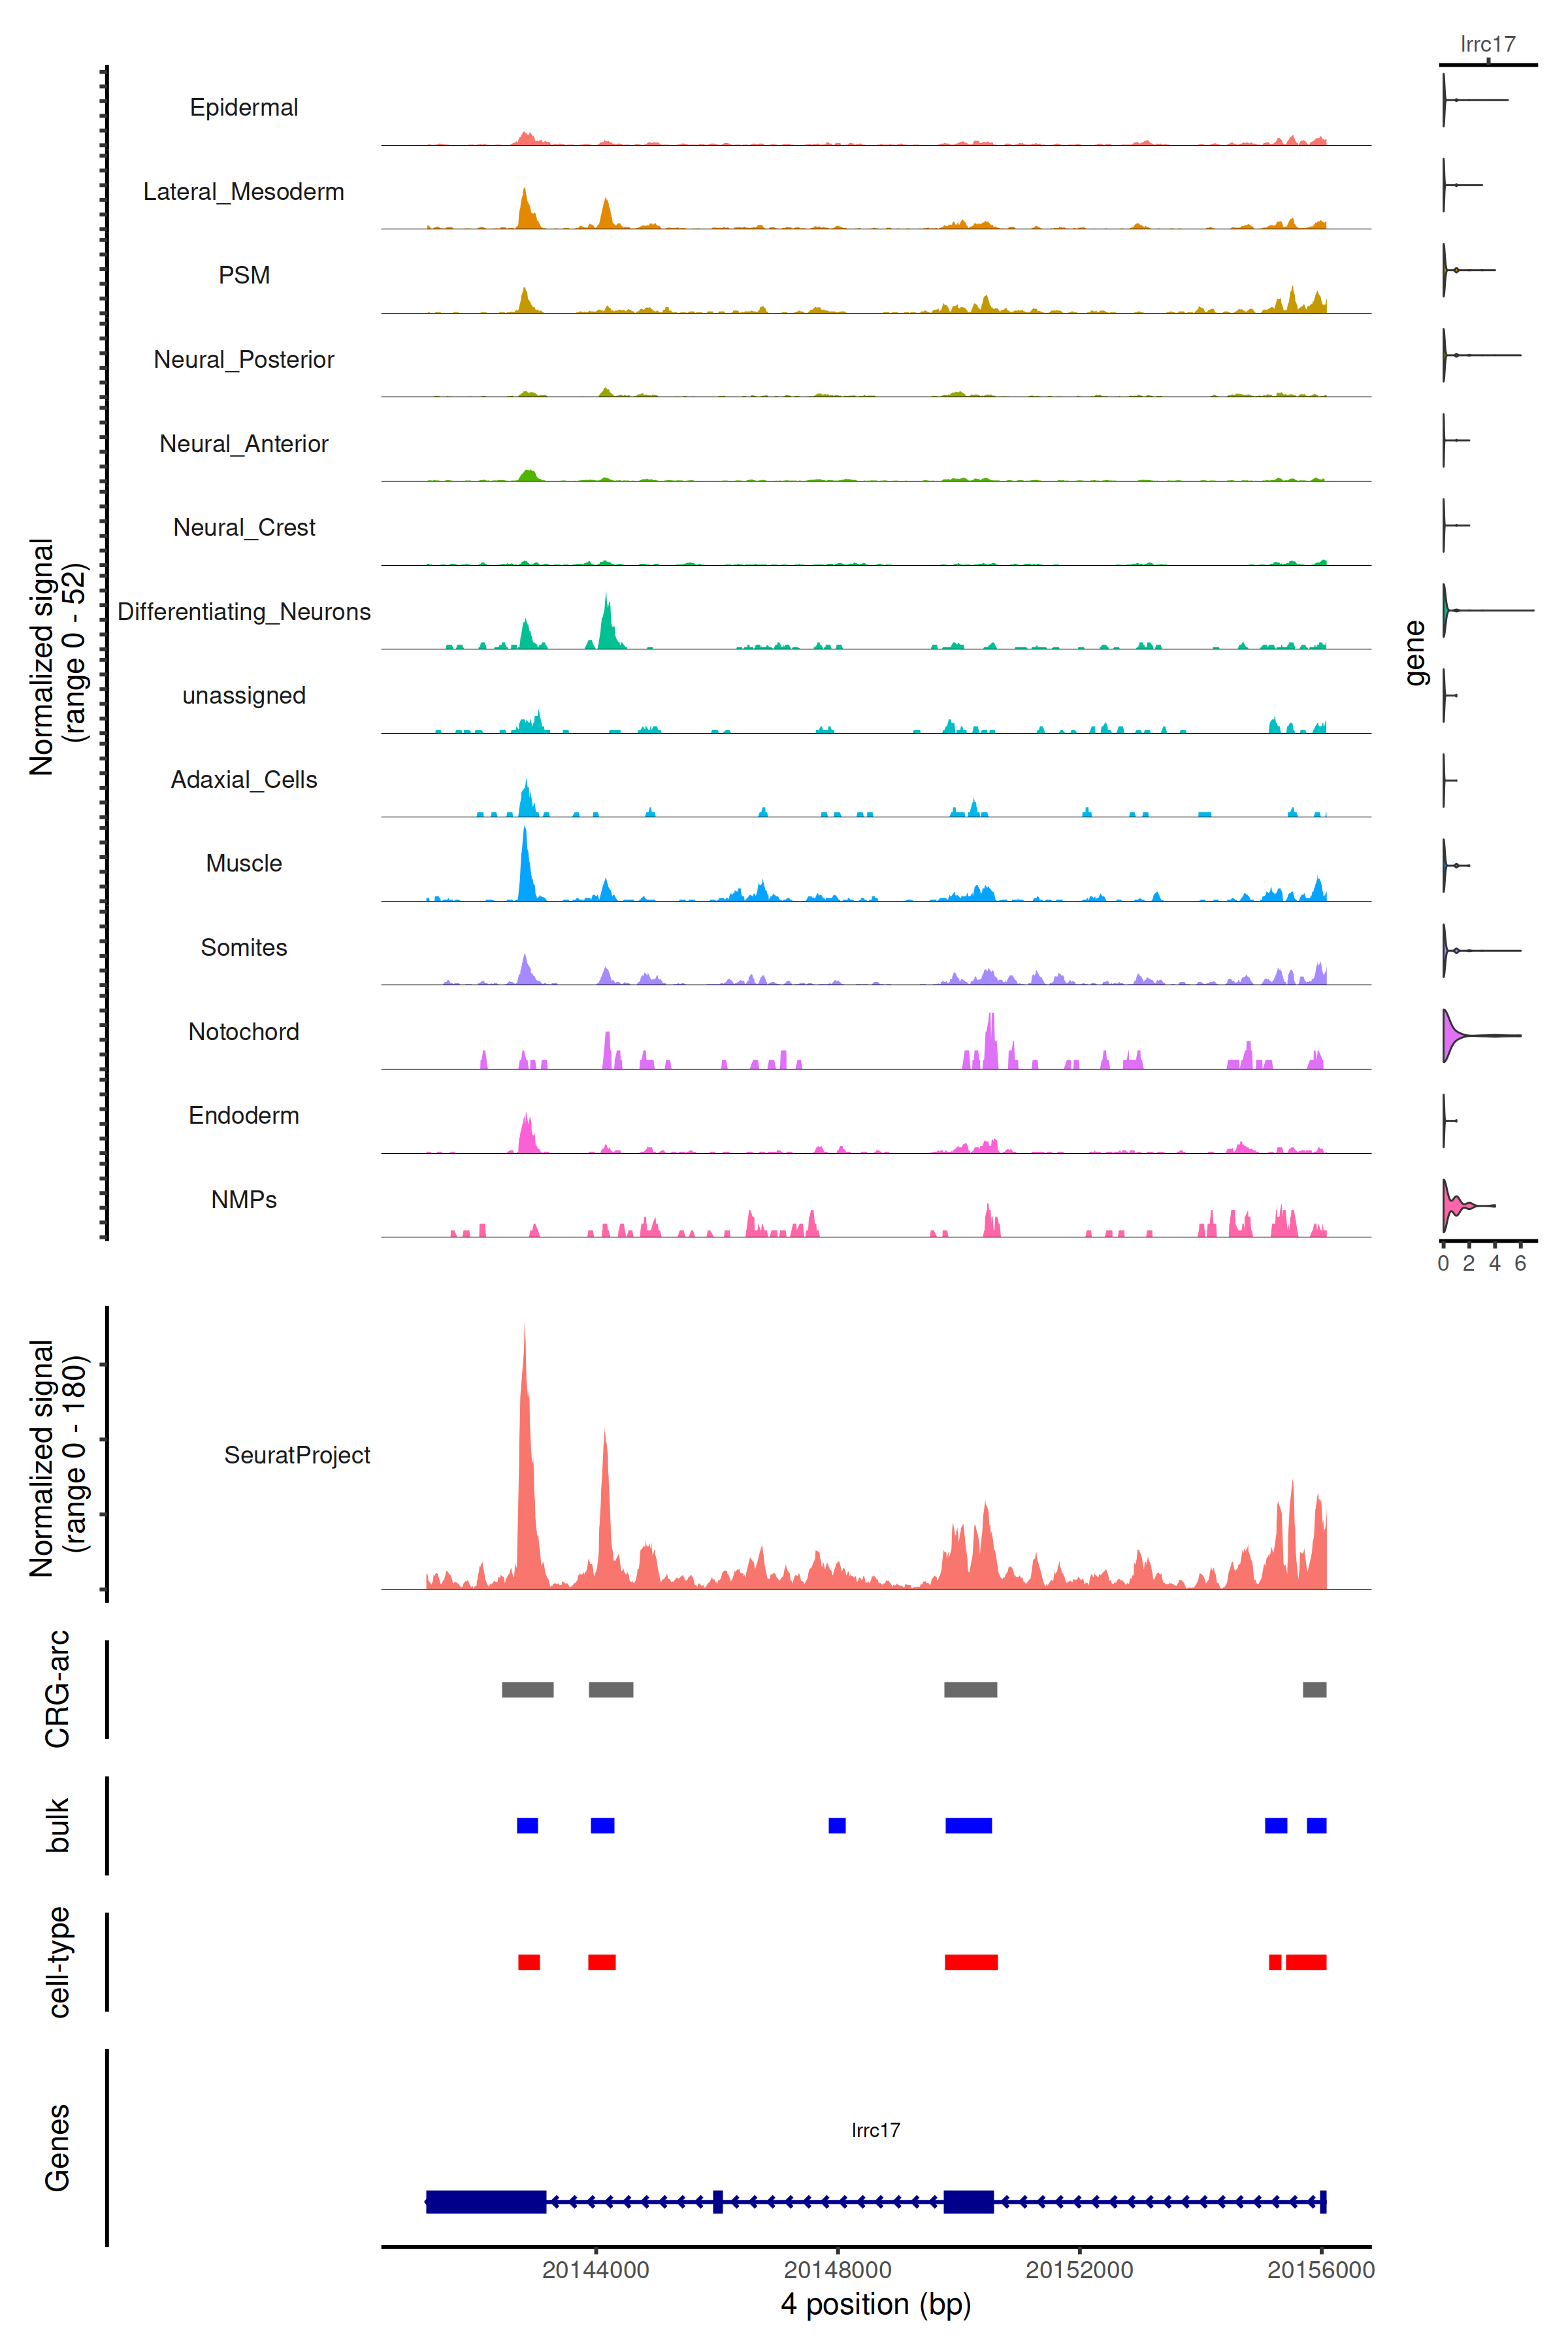

In [134]:
plot_list[1]

## (Optional)

- Check the regions with negative cicero co-accessibility scores


In [6]:
# import the cicero connections
cicero_connections <- read.csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/02_TDR118_cicero_connections_CRG_arc_peaks.csv")
head(cicero_connections)

ERROR: Error in cicero_connections.head(): could not find function "cicero_connections.head"


In [34]:
sorted_cicero_connections <- cicero_connections[order(cicero_connections$coaccess, decreasing = FALSE), ]
head(sorted_cicero_connections)

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,-0.6733118
24926413,25081532,24-17168001-17168928,24-17160375-17161077,-0.6733118
23966202,24115462,23-32198630-32199562,23-32499634-32500463,-0.6653330
23981455,24130795,23-32499634-32500463,23-32198630-32199562,-0.6653330
11469579,11541064,16-33484518-33485430,16-33655530-33656446,-0.6588027
11481776,11553317,16-33655530-33656446,16-33484518-33485430,-0.6588027


In [33]:
sorted_cicero_connections[sorted_cicero_connections$coaccess < -0.6, ]

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,0.6
24926413,25081532,24-17168001-17168928,24-17160375-17161077,0.6
23966202,24115462,23-32198630-32199562,23-32499634-32500463,0.6
23981455,24130795,23-32499634-32500463,23-32198630-32199562,0.6
11469579,11541064,16-33484518-33485430,16-33655530-33656446,0.6
11481776,11553317,16-33655530-33656446,16-33484518-33485430,0.6
9401208,9459959,15-18093330-18094179,15-18340493-18341391,0.6
9414604,9473431,15-18340493-18341391,15-18093330-18094179,0.6
11470495,11541984,16-33494279-33495177,16-33655530-33656446,0.6


In [18]:
library(cicero)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

In [ ]:
ccans <- generate_ccans(cicero_connections)b

In [22]:
region <- sorted_cicero_connections[1, ]$Peak1
region

# # Input string
# input_string <- '24-17160375-17161077'

[1] "24-17160375-17161077"

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


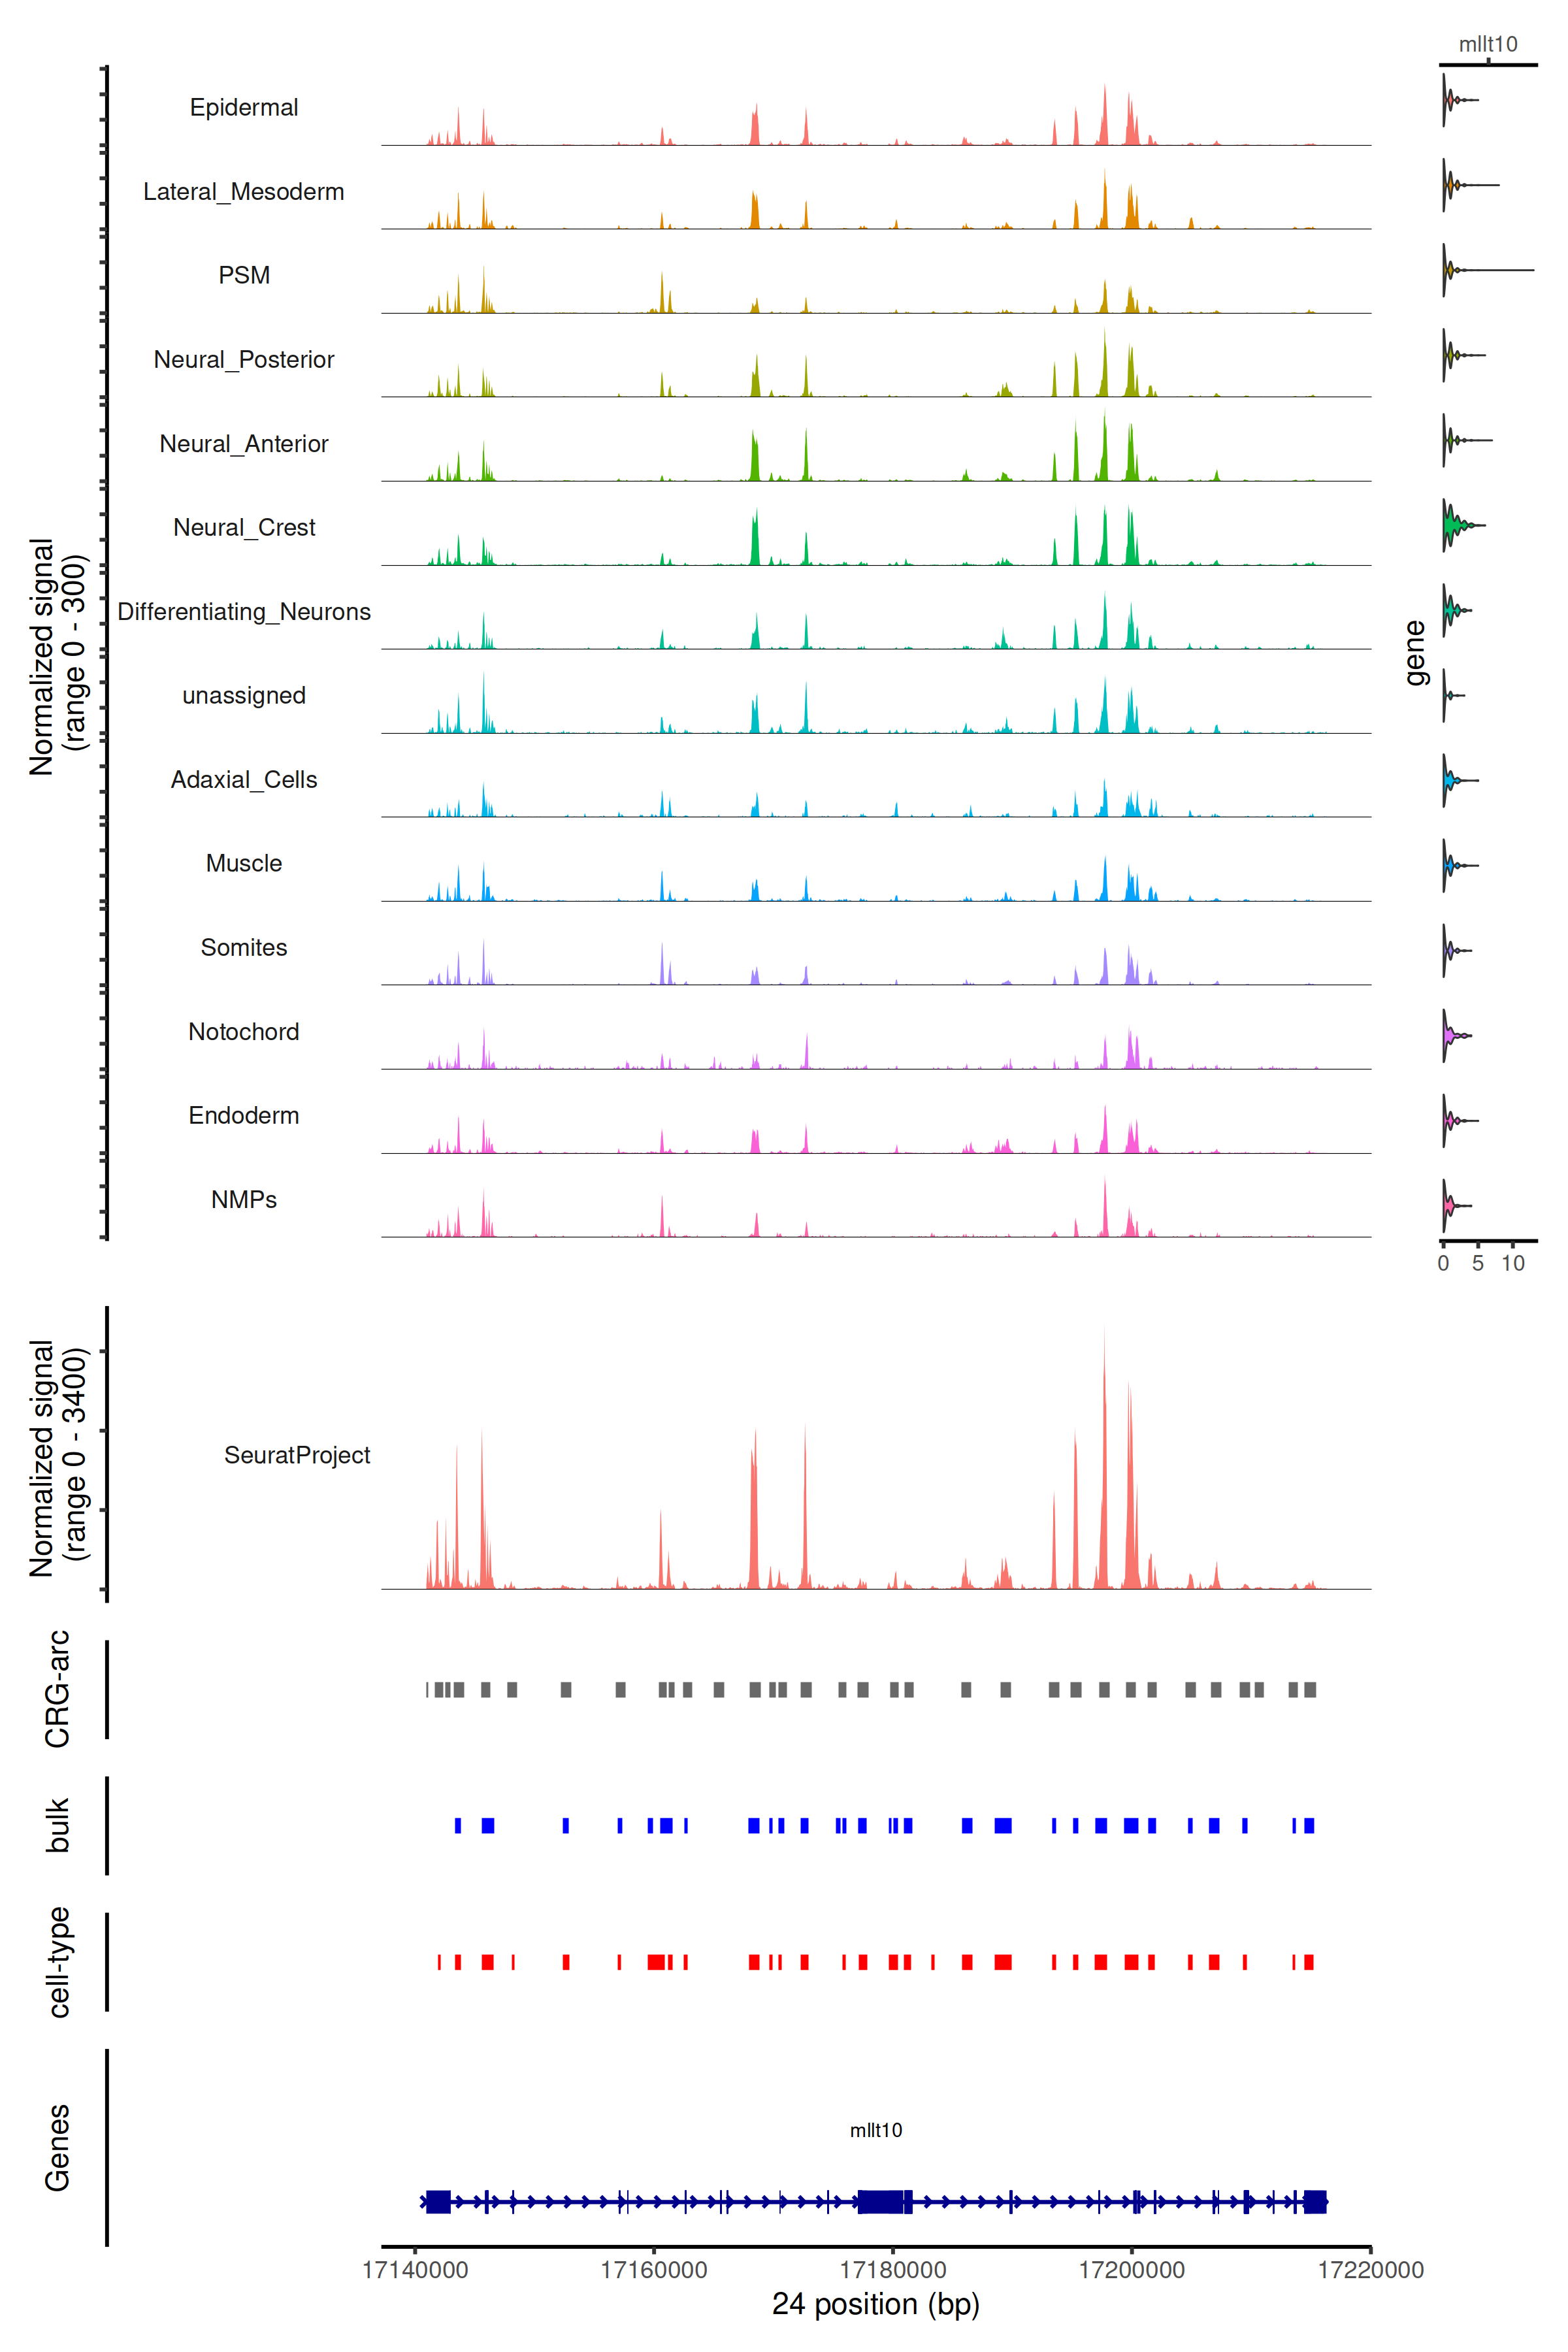

In [27]:
plot <- generate_coverage_plots(TDR118, "mllt10")
plot

# Some hypotheses on the pairs of peaks with highly negative co-accessibilities

- one of the examples, mllt10 has two peaks on the intron regions that are highly negatively correlated (coaccess <-0.6). This might suggest that the pairs of peaks with strong negative co-accessibility might mean that they are within the same gene/transcriptional unit, thus they are not TSS and silencers, rather reporting different transcriptional "states".

- Additional things to check: 

    - whether the highly negatively co-accessible peaks are within the same gene (fraction of peak pairs that were from the same gene).
    - If not, whether they are worth digging into.

Warning message:
"Removed 164 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 164 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


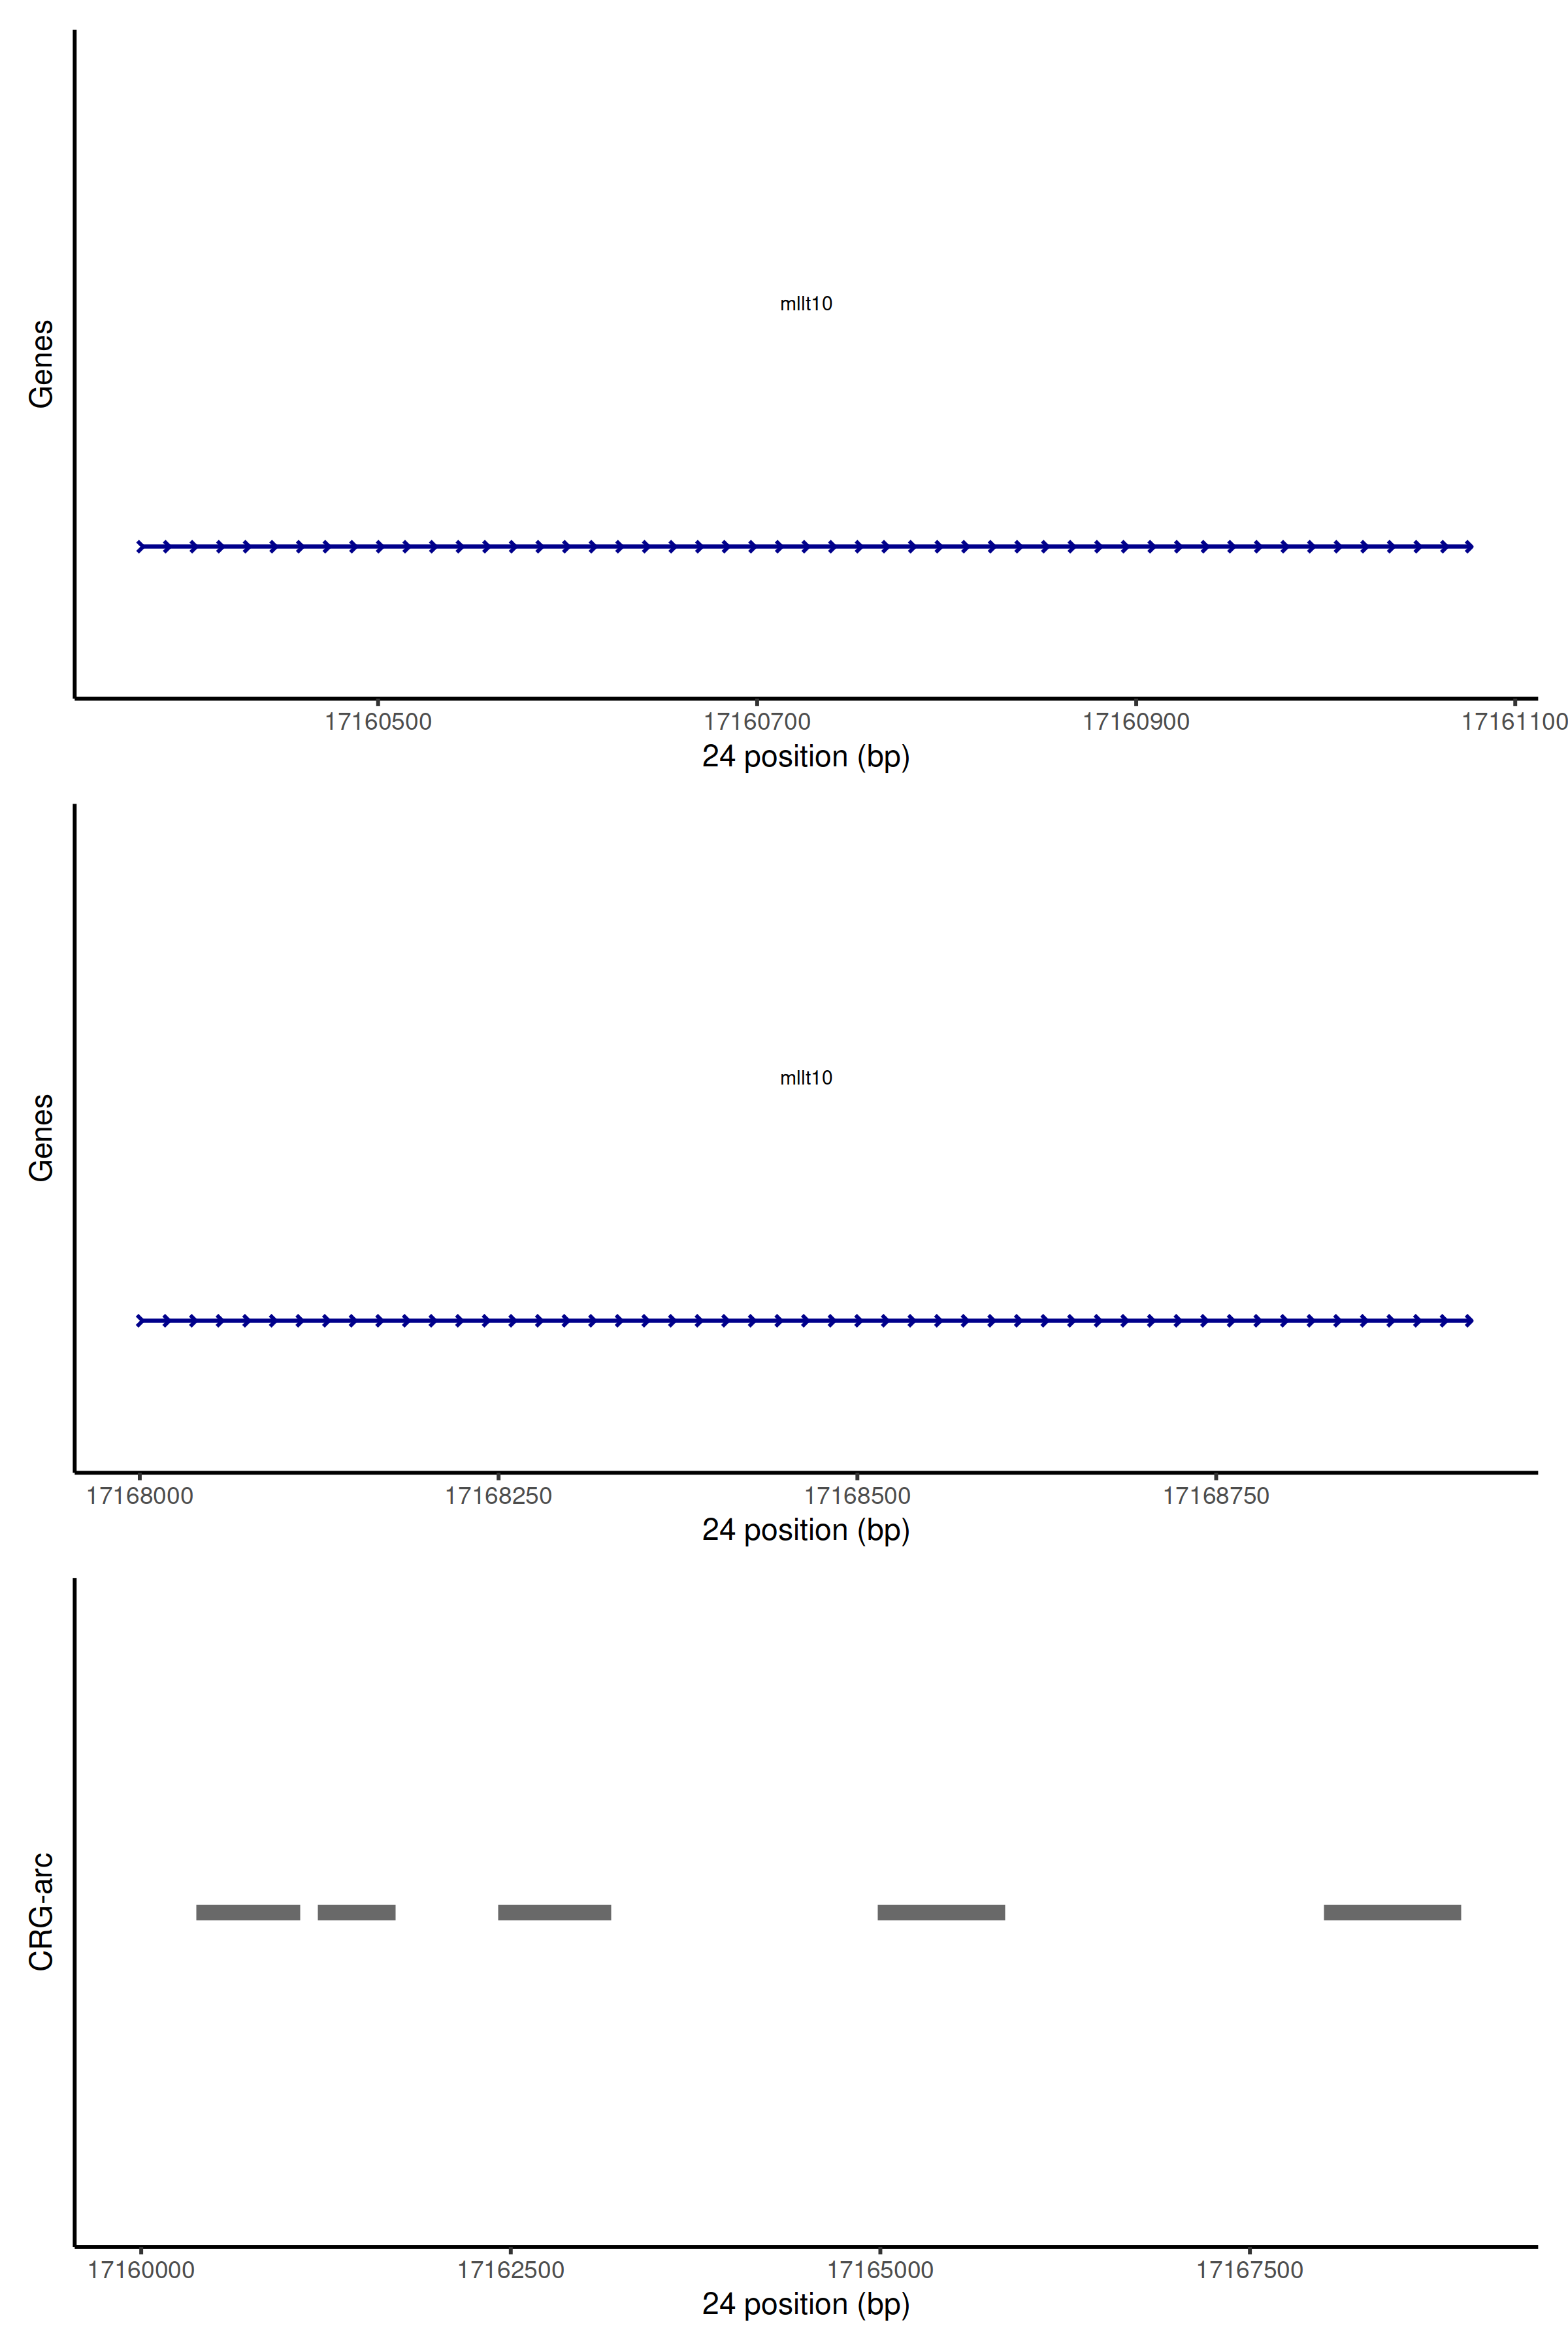

In [36]:
# for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
# gene.coord <- LookupGeneCoords(object = object, gene = gene)
# gene.coord.df <- as.data.frame(gene.coord)

cicero_index = 1
region1 = sorted_cicero_connections[cicero_index, ]$Peak1
region2 = sorted_cicero_connections[cicero_index, ]$Peak2
#24-17160375-17161077	24-17168001-17168928

# # extract the chromosome number, start position and end position
# chromosome <- gene.coord.df$seqnames
# pos_start <- gene.coord.df$start
# pos_end <-gene.coord.df$end

# # compute the genomic region as "chromsome_number-start-end"
# genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")

# gene annotation (peak1)
gene_plot1 <- AnnotationPlot(
  object = TDR118,
  region = region1
)
# gene annotation (peak2)
gene_plot2 <- AnnotationPlot(
  object = TDR118,
  region = region2
)



# cellranger-arc peaks
peak_plot_CRG <- PeakPlot(
  object = TDR118,
  region = "24-17160000-17169000",
  peaks=TDR118@assays$ATAC@ranges
) + labs(y="CRG-arc")
# peak_plot


gene_plot1/gene_plot2/peak_plot_CRG



## (Deprecated) Hacking the Coverage Plot function

In [28]:
as.data.frame(TDR118@assays$ATAC@fragments[[1]])

ERROR: Error in as.data.frame.default(TDR118@assays$ATAC@fragments[[1]]): cannot coerce class ‘structure("Fragment", package = "Signac")’ to a data.frame


In [48]:
fragments <- TDR118@assays$ATAC@fragments[[1]]
fragments

A Fragment object for 13022 cells

In [36]:
GetFragmentData(fragments, slot="path")

[1] "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"

In [42]:
head(TDR118@assays$ATAC@fragments[[1]])

chrom,start,end,barcode,readCount
<int>,<int>,<int>,<chr>,<int>
1,7,134,TACGGTTAGGACAACA-1,2
1,15,611,TCGGTTCTCTTTGAGA-1,3
1,17,47,CCCTCACCAAGGGTTG-1,3
1,19,198,ACTAAAGCAGGCTTCG-1,3
1,41,121,GTAGCGCTCTAAGGAG-1,5
1,50,91,TCCTGTTCAGGCTTGT-1,8


In [50]:
head(fragments)

chrom,start,end,barcode,readCount
<int>,<int>,<int>,<chr>,<int>
1,7,134,TACGGTTAGGACAACA-1,2
1,15,611,TCGGTTCTCTTTGAGA-1,3
1,17,47,CCCTCACCAAGGGTTG-1,3
1,19,198,ACTAAAGCAGGCTTCG-1,3
1,41,121,GTAGCGCTCTAAGGAG-1,5
1,50,91,TCCTGTTCAGGCTTGT-1,8


In [53]:
class(fragments)
str(fragments)

[1] "Fragment"
attr(,"package")
[1] "Signac"

Formal class 'Fragment' [package "Signac"] with 3 slots
  ..@ path : chr "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"
  ..@ hash : chr [1:2] "8ae7d119ba482dd95730ba9e6179f788" "4c53b0fe50688a66a619ee77d057ce02"
  ..@ cells: Named chr [1:13022] "AAACAGCCACCTAAGC-1" "AAACAGCCAGGGAGGA-1" "AAACAGCCATAGACCC-1" "AAACATGCAAACTCAT-1" ...
  .. ..- attr(*, "names")= chr [1:13022] "AAACAGCCACCTAAGC-1" "AAACAGCCAGGGAGGA-1" "AAACAGCCATAGACCC-1" "AAACATGCAAACTCAT-1" ...
  .. ..- attr(*, ".match.hash")=Class 'match.hash' <externalptr> 


In [55]:
frag_df <- data.frame(
  chrom = fragments@chrom,
  start = fragments@start,
  end = fragments@end,
  barcode = fragments@cells,
  readCount = fragments@readCount
)

head(frag_df)

ERROR: Error in data.frame(chrom = fragments@chrom, start = fragments@start, : no slot of name "chrom" for this object of class "Fragment"


In [56]:
frag_df <- as.data.frame(fragments)

head(frag_df[, c("chrom", "start", "end", "barcode", "readCount")])

ERROR: Error in as.data.frame.default(fragments): cannot coerce class ‘structure("Fragment", package = "Signac")’ to a data.frame


In [58]:
frag_df <- data.frame(
  chrom = fragments@ranges@seqnames,
  start = start(fragments@ranges),
  end = end(fragments@ranges),
  barcode = fragments@cells,
  readCount = fragments@readCount
)

head(frag_df)

ERROR: Error in data.frame(chrom = fragments@ranges@seqnames, start = start(fragments@ranges), : no slot of name "ranges" for this object of class "Fragment"


In [60]:
frag_df <- data.frame(
  chrom = fragments@regions@seqnames,
  start = start(fragments@regions),
  end = end(fragments@regions),
  barcode = fragments@cells,
  readCount = fragments@readCount
)

head(frag_df)

ERROR: Error in data.frame(chrom = fragments@regions@seqnames, start = start(fragments@regions), : no slot of name "regions" for this object of class "Fragment"
